In [5]:
import pandas as pd

#생활인구 데이터 불러오기
population = pd.read_csv('D:/Task/Rawdata/local_people.csv', encoding='UTF8', index_col=False)
dong_code = pd.read_excel('D:/Task/Rawdata/dong_code.xlsx',  index_col=False)
# dong_code = dong_code.drop([0,0], axis=0, inplace = True)

# 데이터 형식을 맞추기 위해 열의 데이터 형식 변경
population['행정동코드'] = population['행정동코드'].astype(str)
dong_code['행자부행정동코드'] = dong_code['행자부행정동코드'].astype(str)

#병합 데이터
result = pd.merge(population, dong_code, left_on='행정동코드', right_on='행자부행정동코드')

#결측치 확인
result.isna().sum()
result.isnull().sum()
result.head() 
# result.drop(['집계구코드'],axis=1)


code = pd.read_excel('D:/Task/Rawdata/dong_code.xlsx',) # 코드매핑정보
code.rename(columns={'행자부행정동코드':'행정동코드'},inplace=True)
code.drop([0],inplace=True)
code['행정동코드'] = code['행정동코드'].astype('int')

lp_df = pd.read_csv('D:/Task/Rawdata/local_people.csv', encoding='UTF8') 
lp_df.reset_index(inplace=True)
lp_df = lp_df[['index','기준일ID','시간대구분','행정동코드']]
lp_df.columns = ['기준일ID','시간대구분','행정동코드','총생활인구수']
lp_df = pd.merge(left=lp_df, right=code, how='inner', on='행정동코드')
df_jongro = lp_df[lp_df['시군구명']=='종로구'] # 459543(서울시 전체) -> 7080(종로구)
df_jongro.drop(['기준일ID', '시간대구분'], axis=1, inplace=True)
dong_name = df_jongro['행정동명'].unique() #['숭인2동', '숭인1동', '혜화동', '가회동', '창신3동', '평창동', '창신1동', '창신2동', '교남동',
       #'부암동', '종로1.2.3.4가동', '사직동', '무악동', '종로5.6가동', '청운효자동', '이화동',
       #'삼청동']
new = df_jongro.drop_duplicates()
sung = df_jongro[df_jongro['행정동명'] == '숭인2동']
print(sung['총생활인구수'].mean()) #11506.448447446237

result = df_jongro.groupby('행정동명')['총생활인구수'].sum()
result = result.to_frame()

# 행정동별 총생활인구수를 24로 나눈 결과를 리스트로 저장
# 즉 24시간 내 평균 생활인구수임
result2 = [[name, int(num // 24)] for name, num in zip(result.index, result['총생활인구수'])]

print(result2)

11506.448447446237
[['가회동', 205875], ['교남동', 235901], ['무악동', 202922], ['부암동', 415263], ['사직동', 757985], ['삼청동', 177163], ['숭인1동', 225860], ['숭인2동', 356699], ['이화동', 763710], ['종로1.2.3.4가동', 1929417], ['종로5.6가동', 518656], ['창신1동', 248194], ['창신2동', 281581], ['창신3동', 146531], ['청운효자동', 504993], ['평창동', 543699], ['혜화동', 874894]]


C:\Users\User\AppData\Local\Temp\ipykernel_19408\3600038120.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jongro.drop(['기준일ID', '시간대구분'], axis=1, inplace=True)


[['가회동', 205875], ['교남동', 235901], ['무악동', 202922], ['부암동', 415263], ['사직동', 757985], ['삼청동', 177163], ['숭인1동', 225860], ['숭인2동', 356699], ['이화동', 763710], ['종로1.2.3.4가동', 1929417], ['종로5.6가동', 518656], ['창신1동', 248194], ['창신2동', 281581], ['창신3동', 146531], ['청운효자동', 504993], ['평창동', 543699], ['혜화동', 874894]]
           행정동명  평균생활인구수
0           가회동   205875
1           교남동   235901
2           무악동   202922
3           부암동   415263
4           사직동   757985
5           삼청동   177163
6          숭인1동   225860
7          숭인2동   356699
8           이화동   763710
9   종로1.2.3.4가동  1929417
10      종로5.6가동   518656
11         창신1동   248194
12         창신2동   281581
13         창신3동   146531
14        청운효자동   504993
15          평창동   543699
16          혜화동   874894


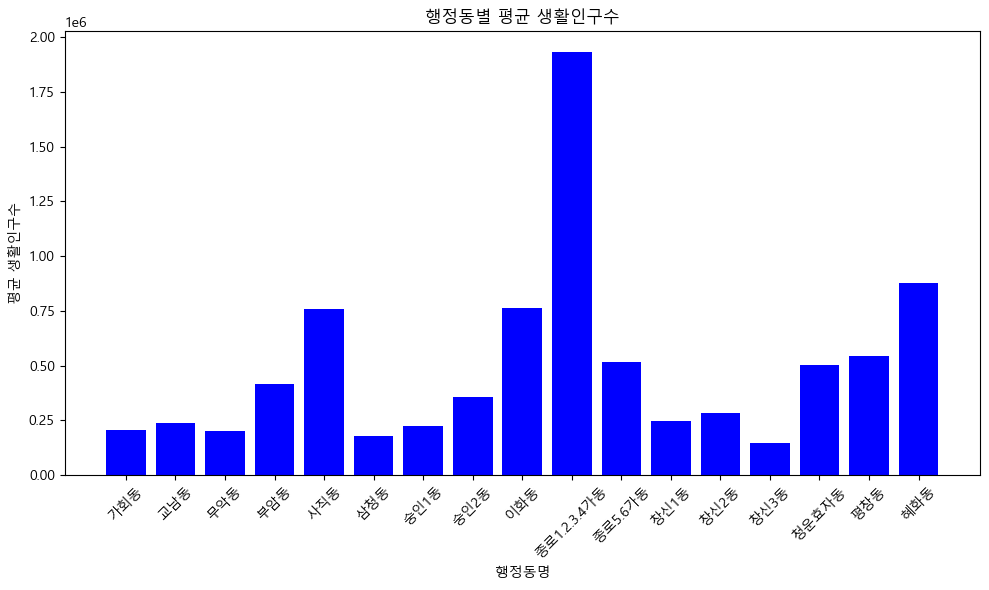

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

result = df_jongro.groupby('행정동명')['총생활인구수'].sum()
result = result.to_frame()

# 행정동별 총생활인구수를 24로 나눈 결과를 리스트로 저장
# 즉 24시간 내 평균 생활인구수임
result2 = [[name, int(num // 24)] for name, num in zip(result.index, result['총생활인구수'])]

print(result2)
result3 = [y for x in result2 for y in x]
result3 
# pd.DataFrame(result3, columns = ['col1', 'col2'])
# result3
df_result = pd.DataFrame(result2, columns=['행정동명', '평균생활인구수'])

print(df_result)
df_result.to_excel('D:/Task/Rawdata/meanpopulation_jongro.xlsx')

#전처리 작업
# df_result.drop('행정동', axis=1, inplace=True)
df_result.head()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(df_result['행정동명'], df_result['평균생활인구수'], color='blue')
plt.xlabel('행정동명')
plt.ylabel('평균 생활인구수')
plt.title('행정동별 평균 생활인구수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('D:/Task/image/population.png')


## 데이터 구조 확인 작업

In [85]:
# 실제 사용한 데이터 목록
# 쓰레기, 생활인구, 상권, 지하철역, 버스정류장
# trash, df_result, business, selected_stations, test

# # 쓰레기 데이터 확인 작업
# trash.shape
# trash.isnull().sum()

# # 생활인구 데이터 확인 작업
# df_result.shape
# df_result.isnull().sum()

# # 상권 데이터 확인 작업
# business.shape
# business.isnull().sum()

# # 지하철역 데이터 확인 작업
# selected_stations.shape
# selected_stations.isnull().sum()

# # 버스정류장 데이터 확인 작업
# test.shape
# test.isnull().sum()

# print(trash.describe())
# print(trash.dtypes)
# print(trash.mode(axis=0, numeric_only=False, dropna=True))
# def checkout(check_list):
#     for check in check_list:
#         print(check.describe())
#         print(check.dtypes)
        
# check_lists = [trash, df_result, business, selected_stations, test]
# # for check in check_lists:
# #     print(check.describe())
# #     print(check.dtypes)
    

        
# checkout(check_lists)
bus = pd.read_csv('D:/Task/Rawdata/processed_files/bus_station_jongro2.csv', encoding='cp949')
bus.head()

Unnamed: 0           정류소명        Y좌표         X좌표              주소   dong
0           0        종로2가사거리  37.569808  126.987752  서울특별시 종로구 종로2가   종로2가
1           1    창경궁.서울대학교병원  37.579183  126.996566   서울특별시 종로구 연건동    연건동
2           2      명륜3가.성대입구  37.582581  126.998251  서울특별시 종로구 명륜4가   명륜4가
3           3       종로2가.삼일교  37.568579  126.987613   서울특별시 종로구 관철동    관철동
4           4  혜화동로터리.여운형활동터  37.586243  127.001744   서울특별시 종로구 혜화동    혜화동

쓰레기 데이터


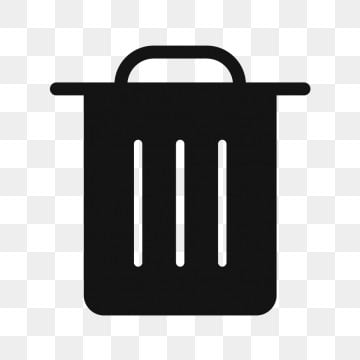
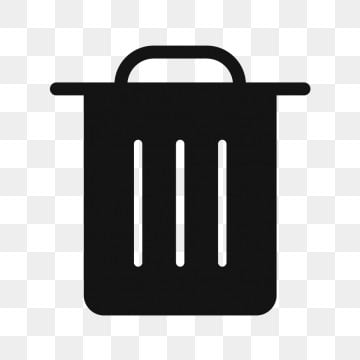
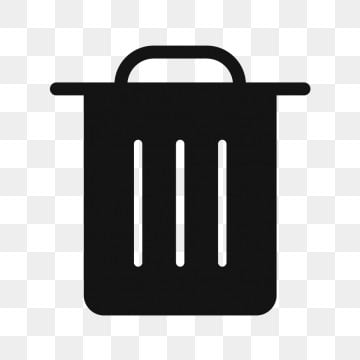
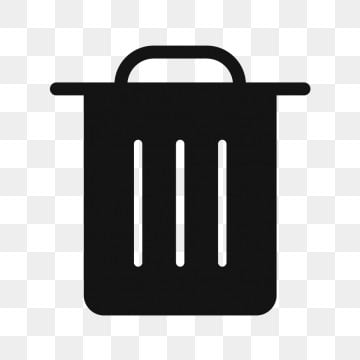
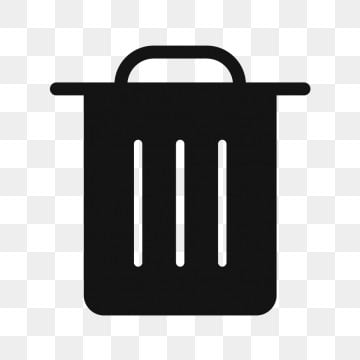
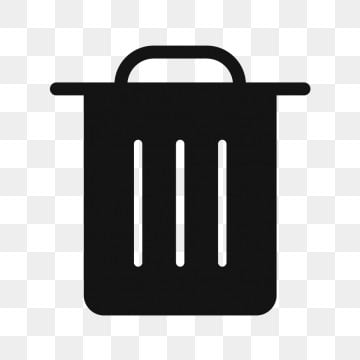
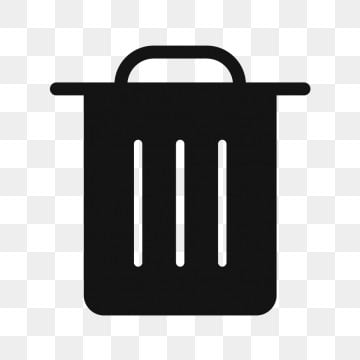
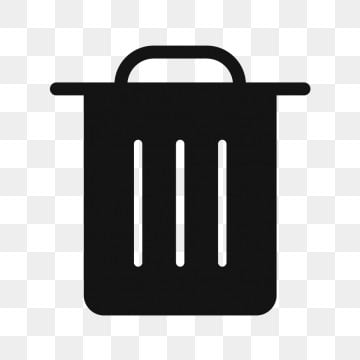
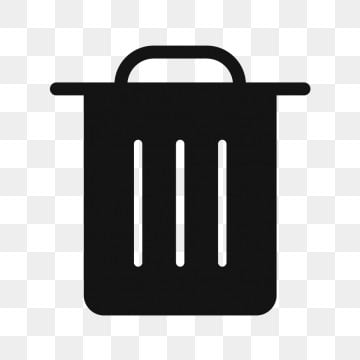
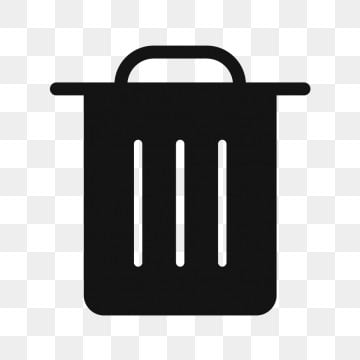
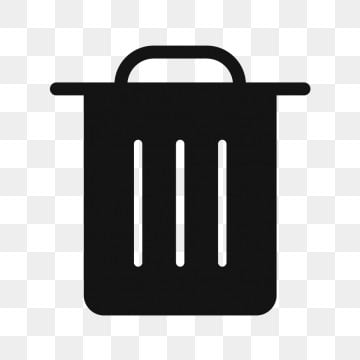
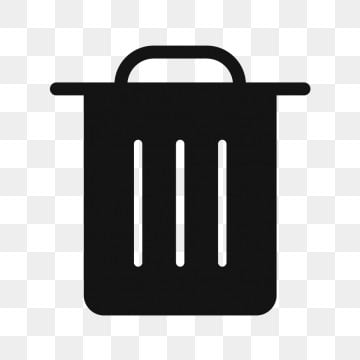
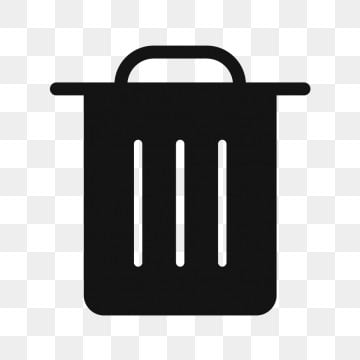
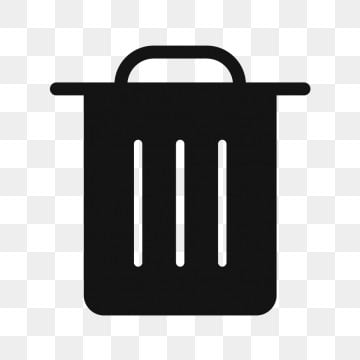
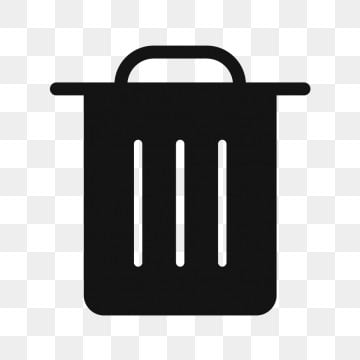
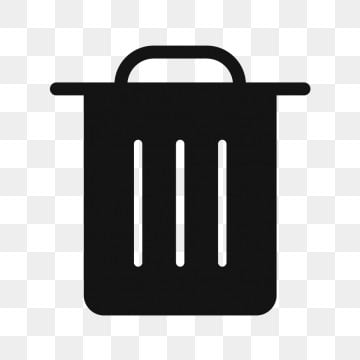
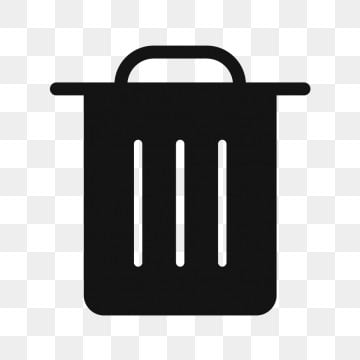
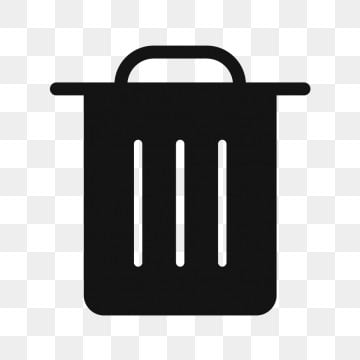
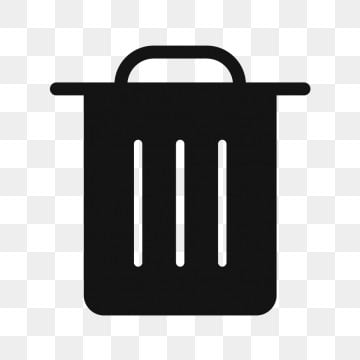
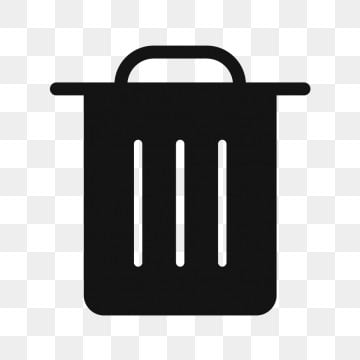
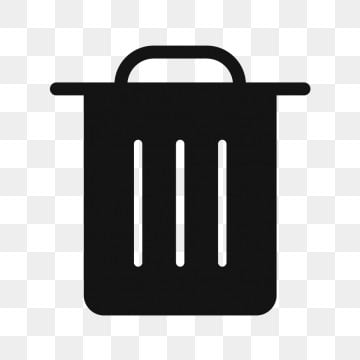
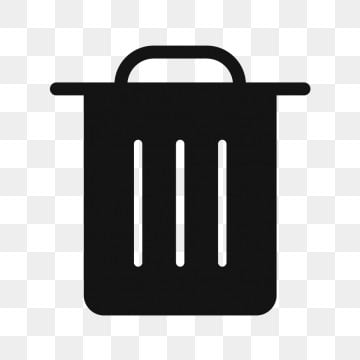
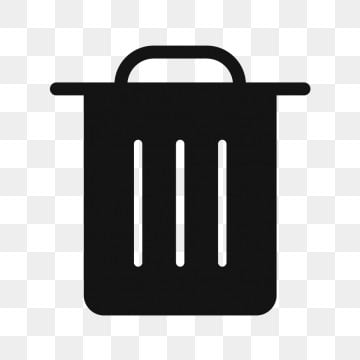
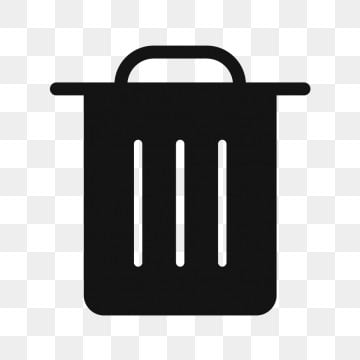
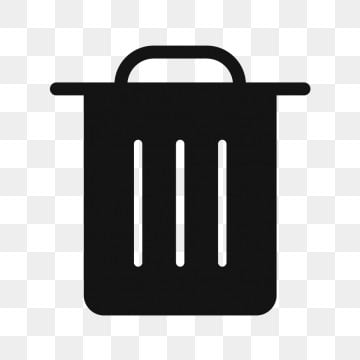
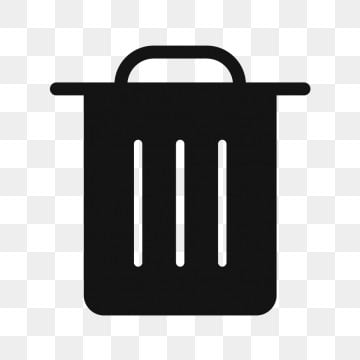
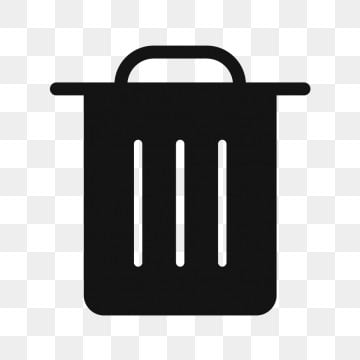
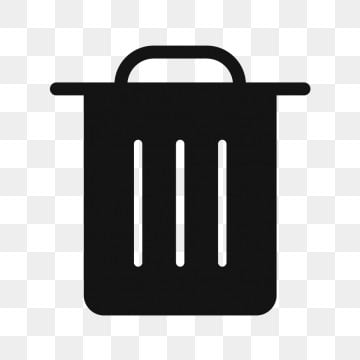
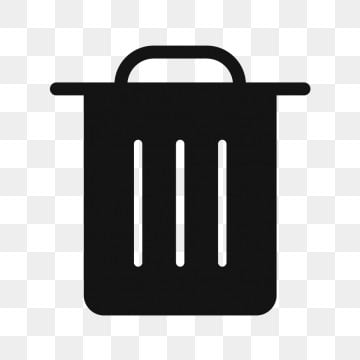
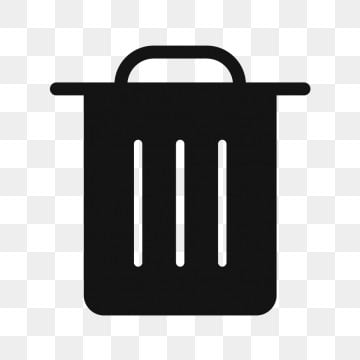
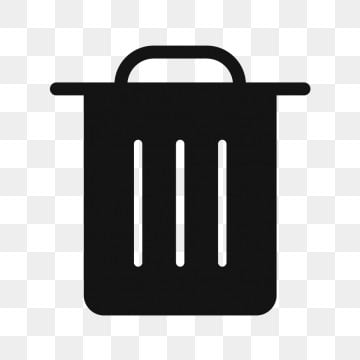
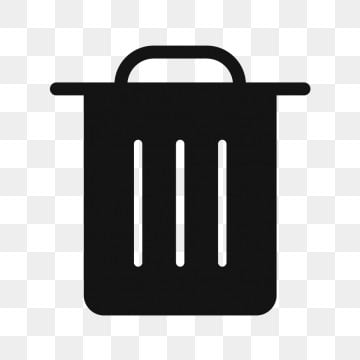
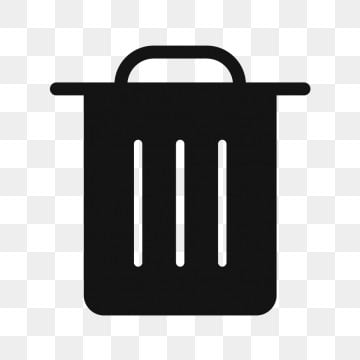
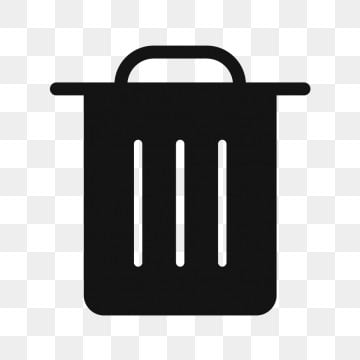
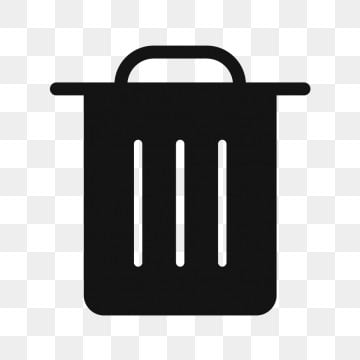
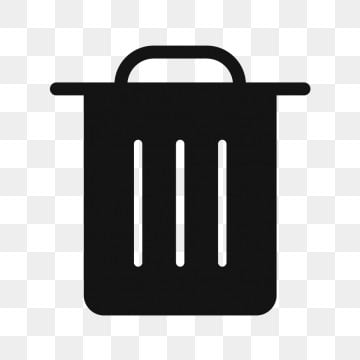
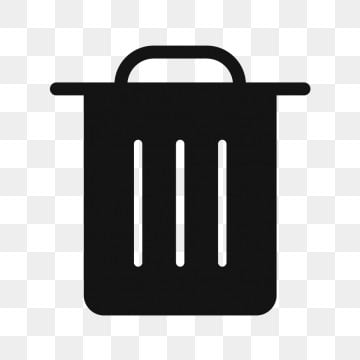
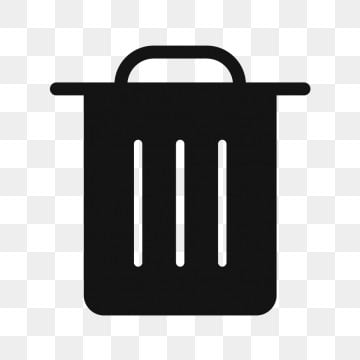
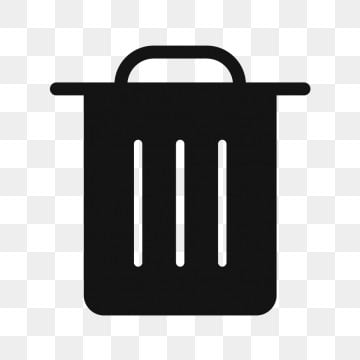
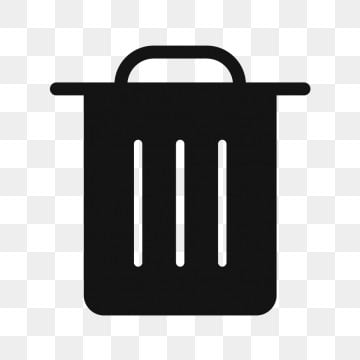
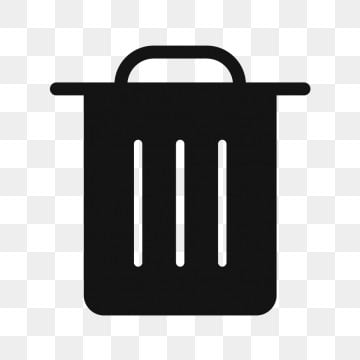
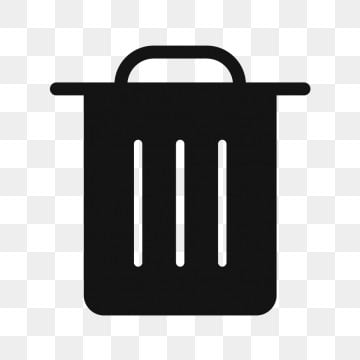
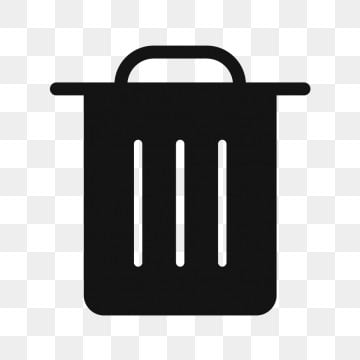
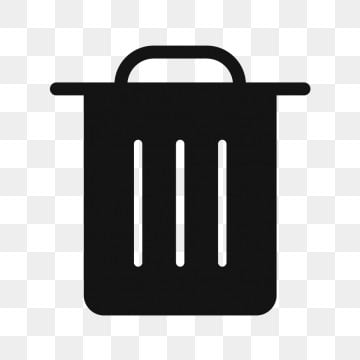
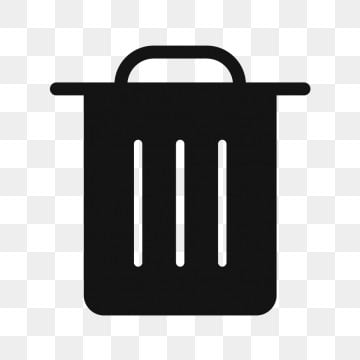
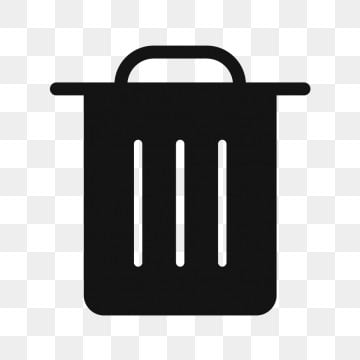
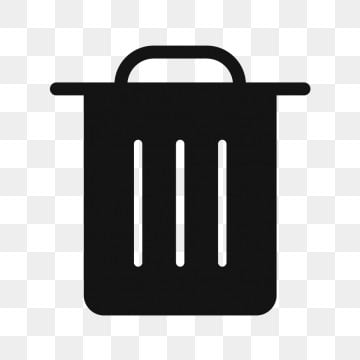
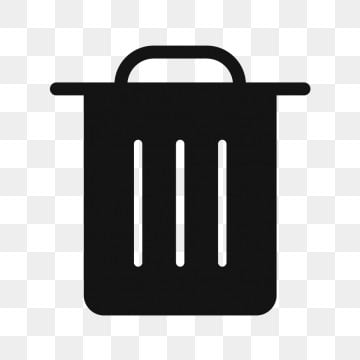
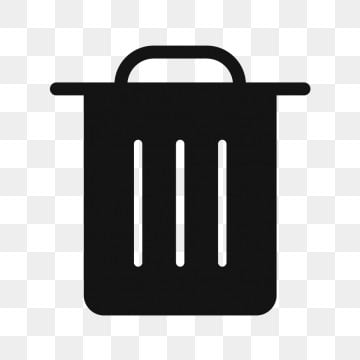
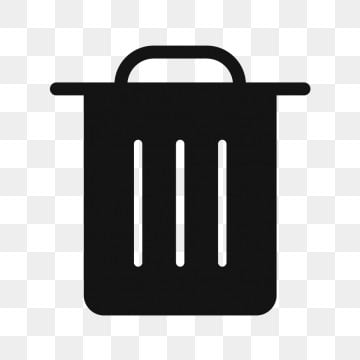
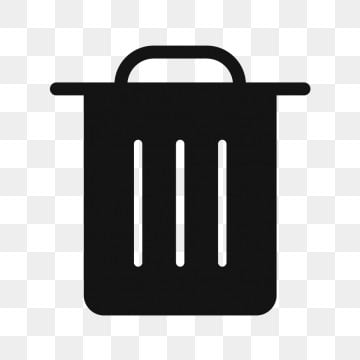
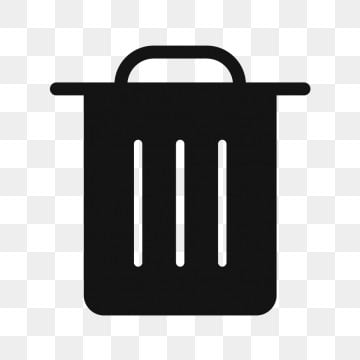
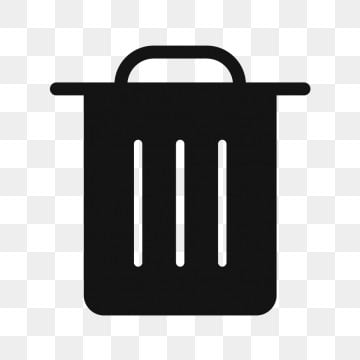
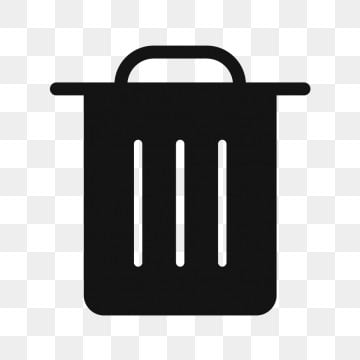
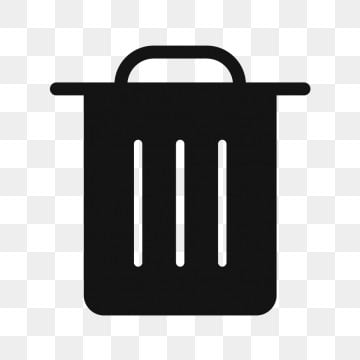
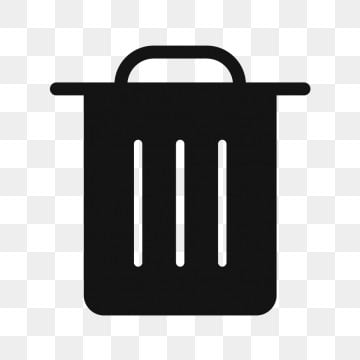
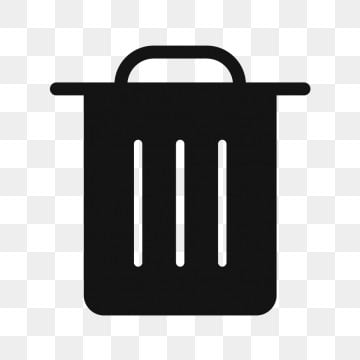
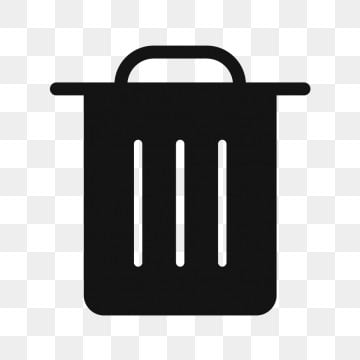
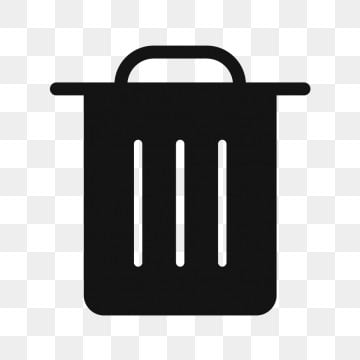
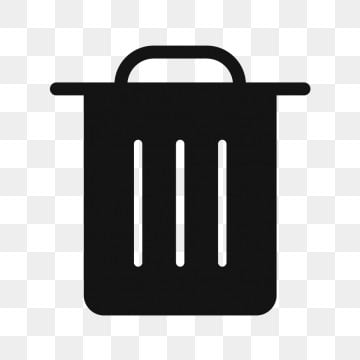
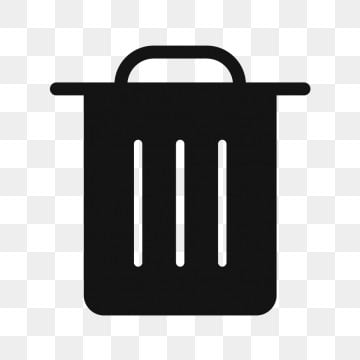
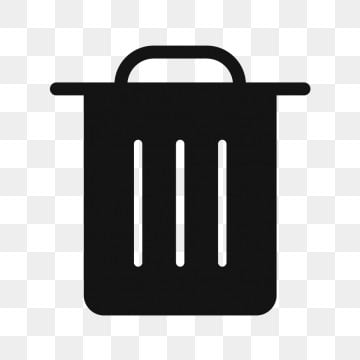
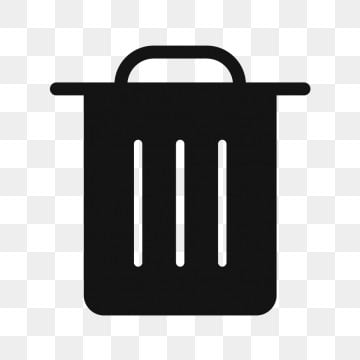
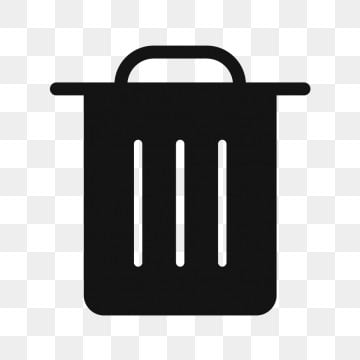
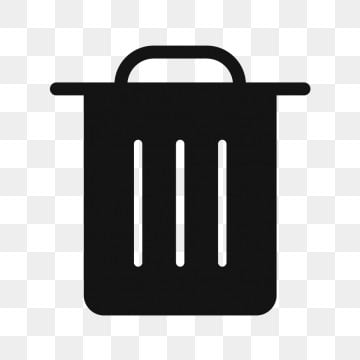
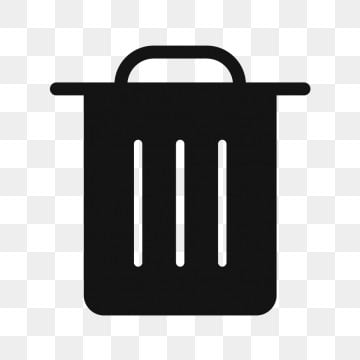
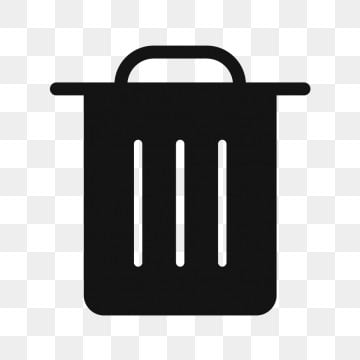
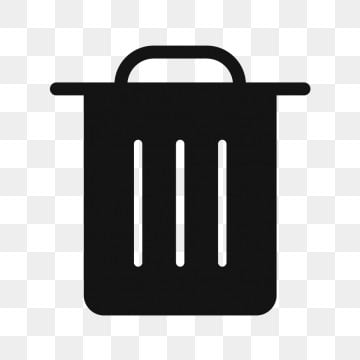
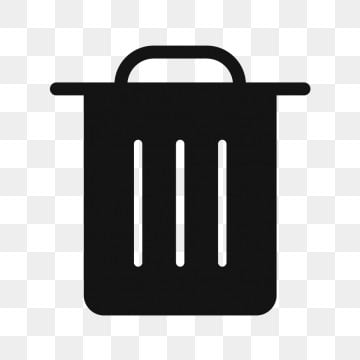
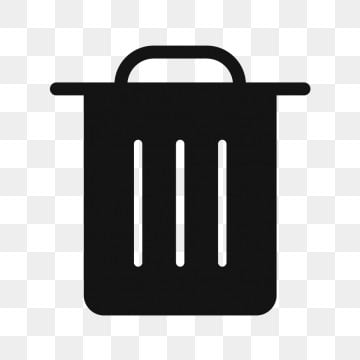
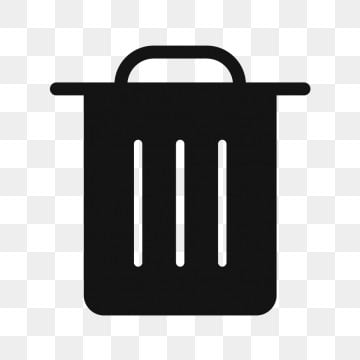
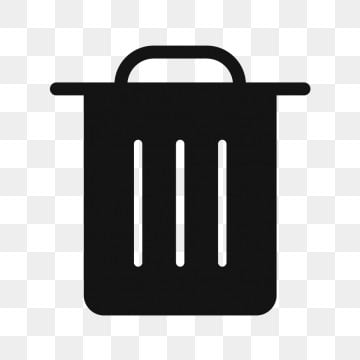
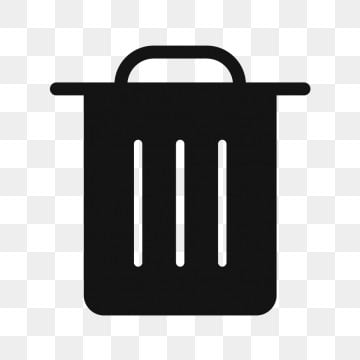
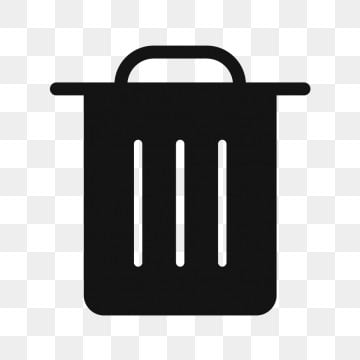
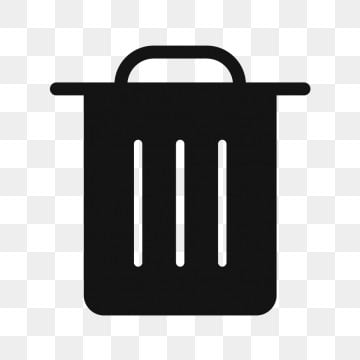
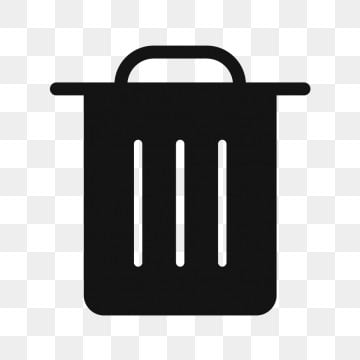
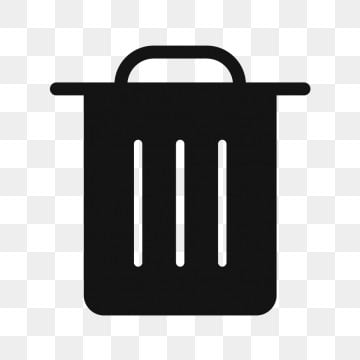
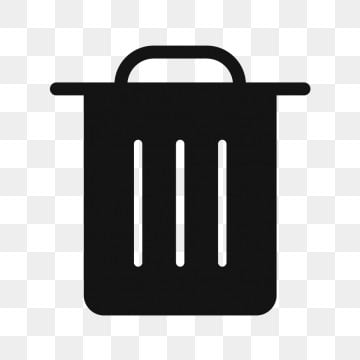
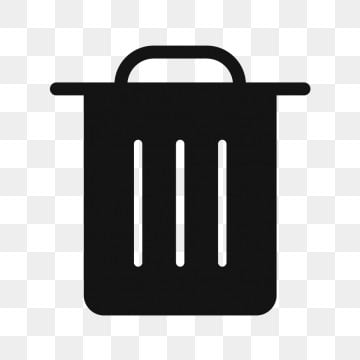
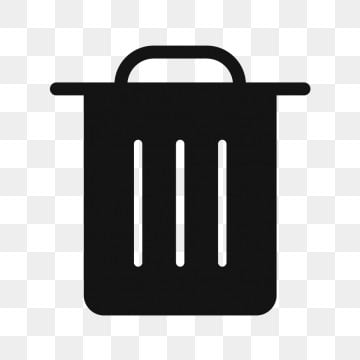
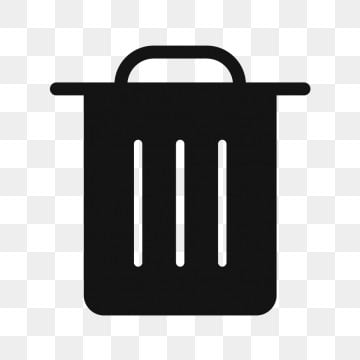
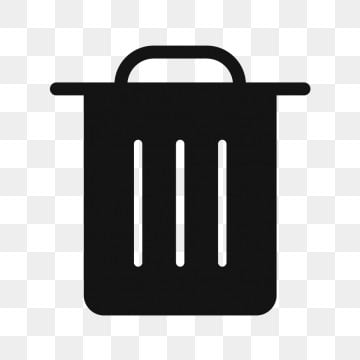
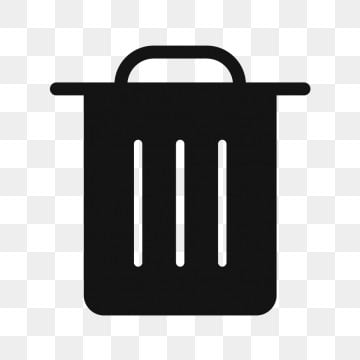
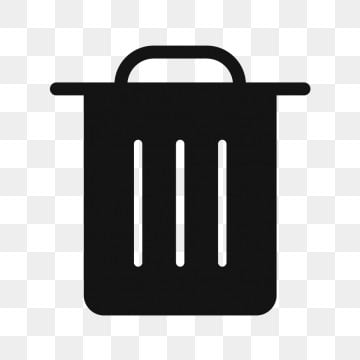
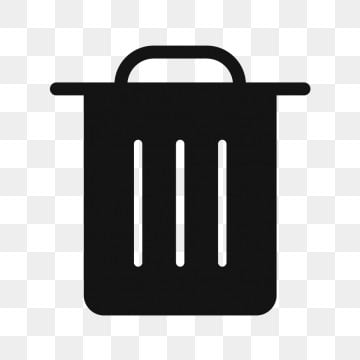
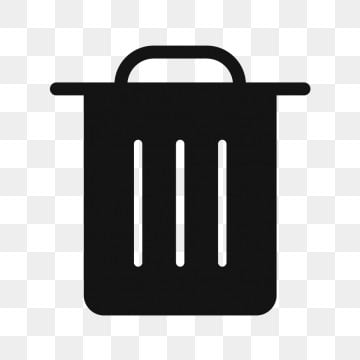
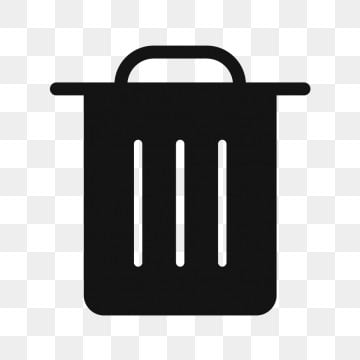
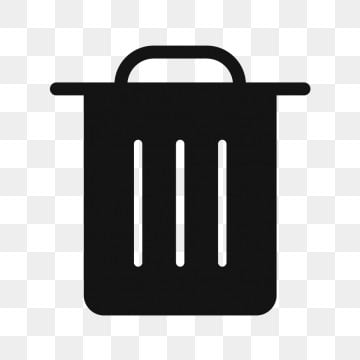
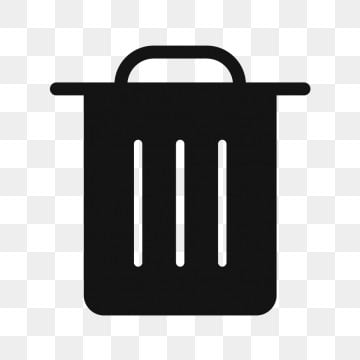
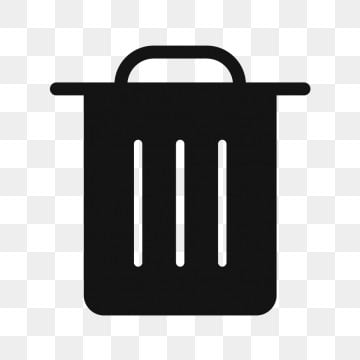
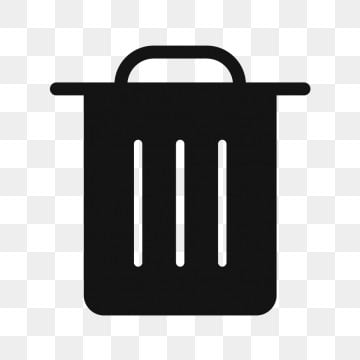
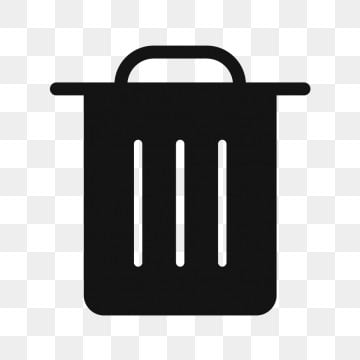
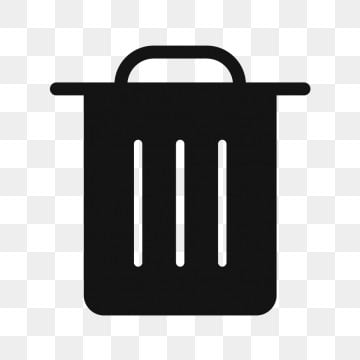
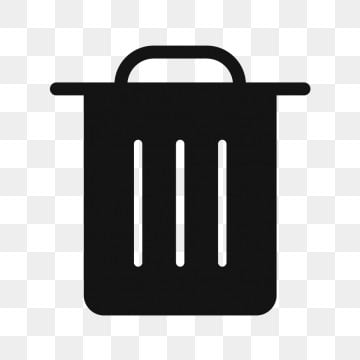
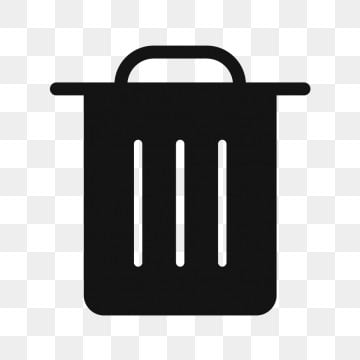
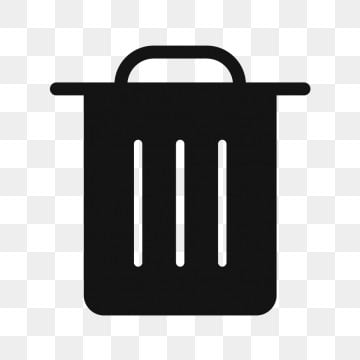
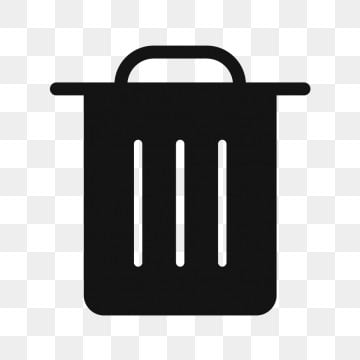
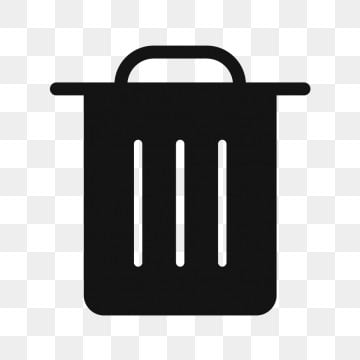
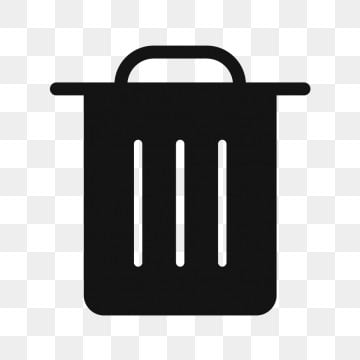
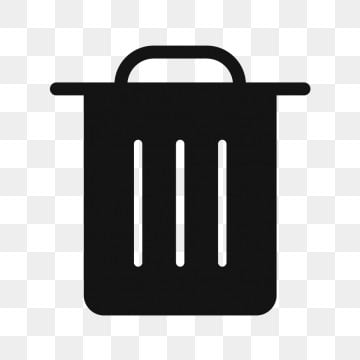
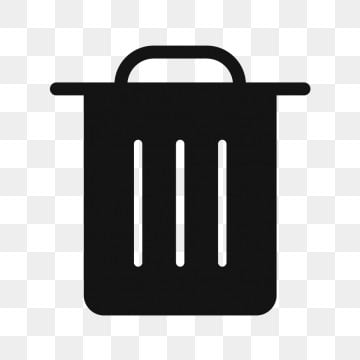
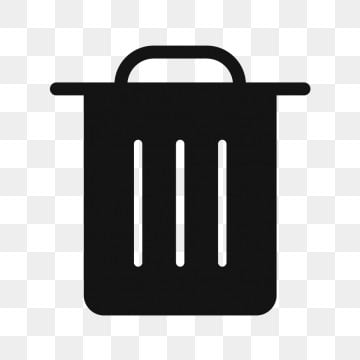
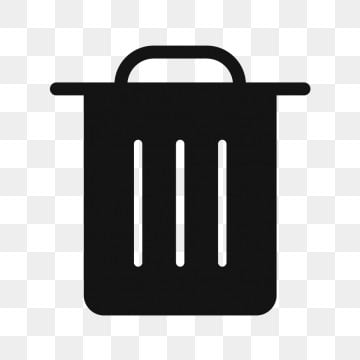
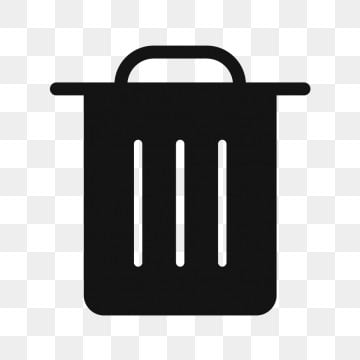
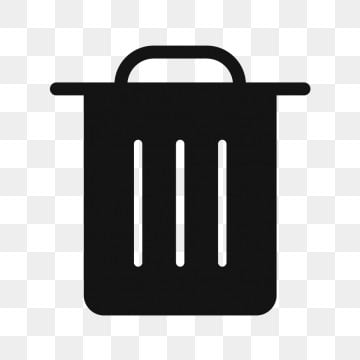
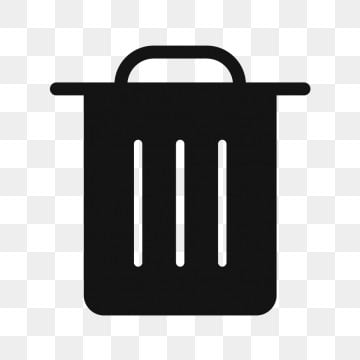
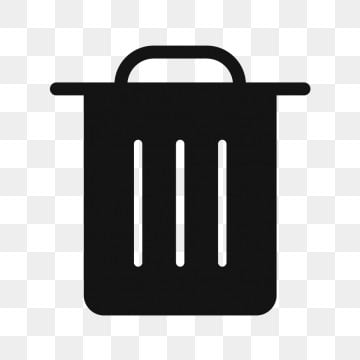
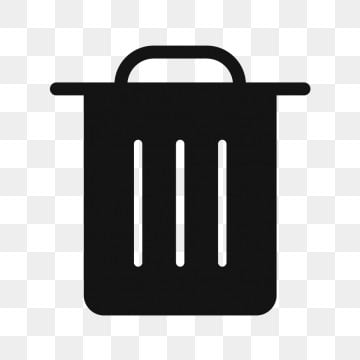
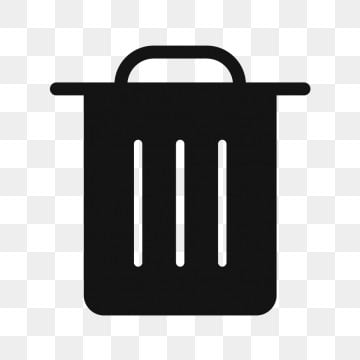
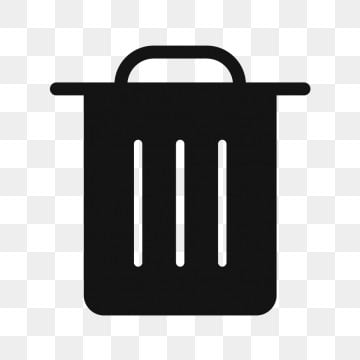
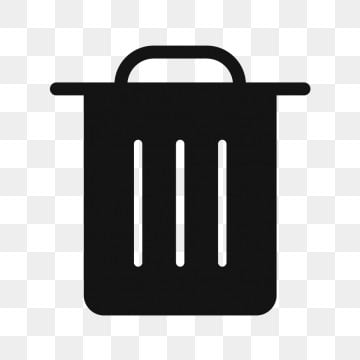
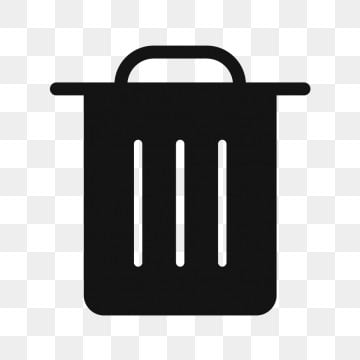
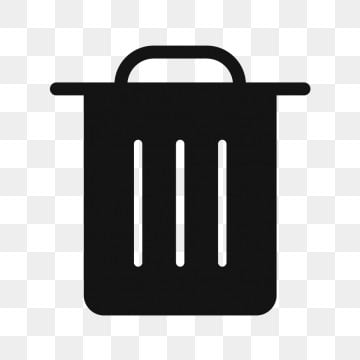
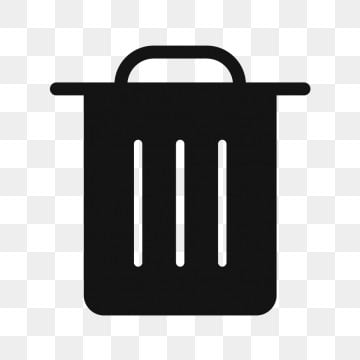
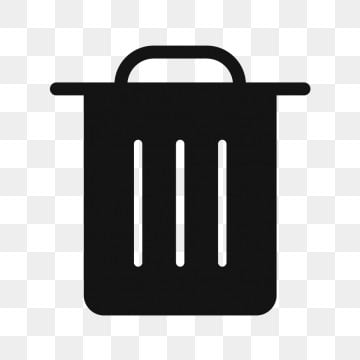
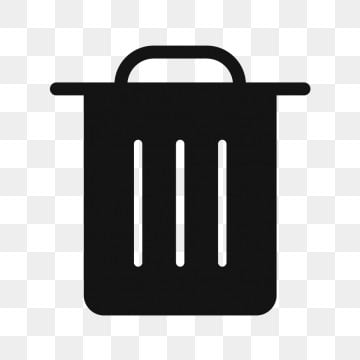
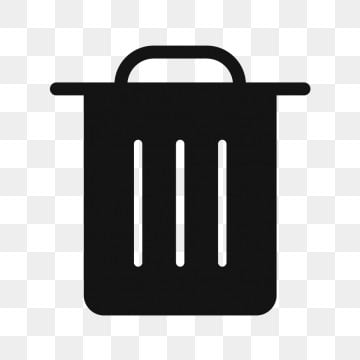
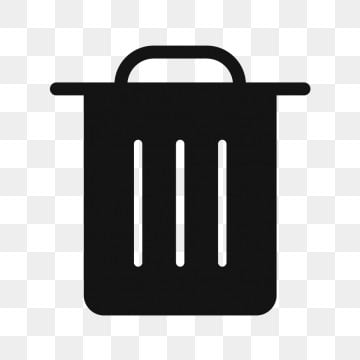
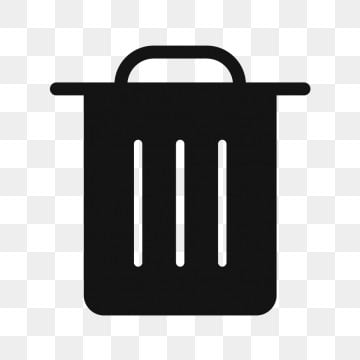
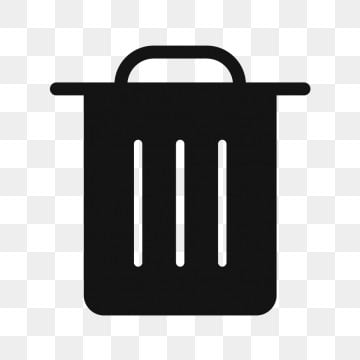
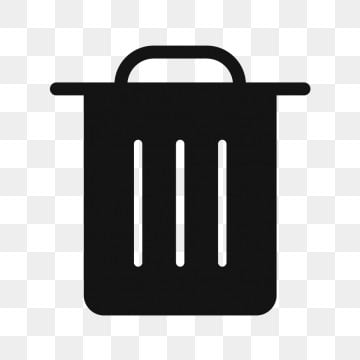
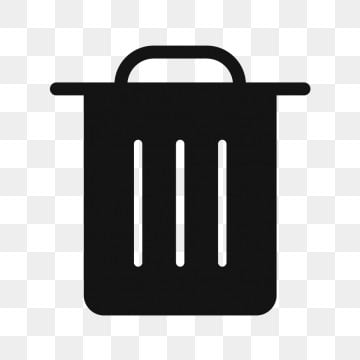
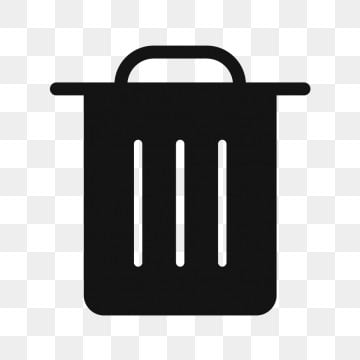
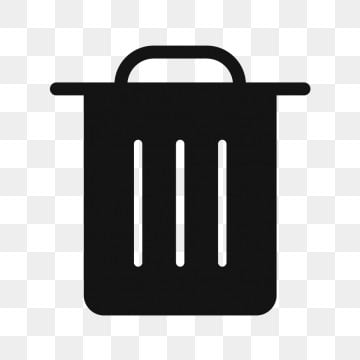
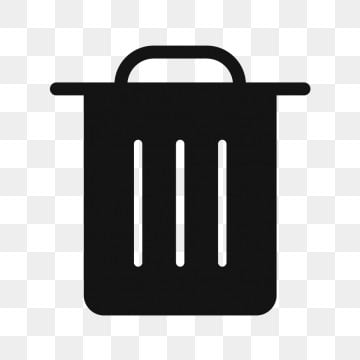
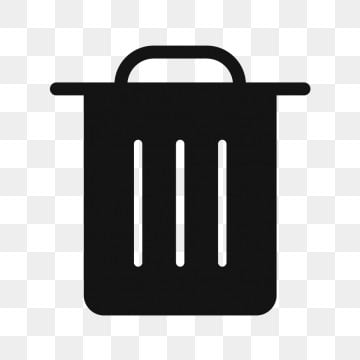
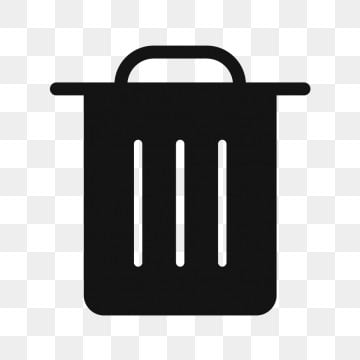
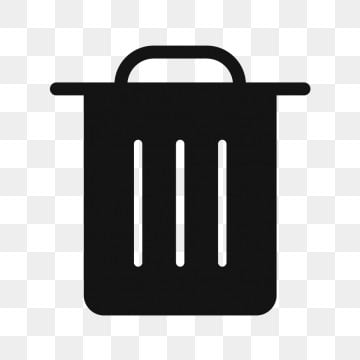
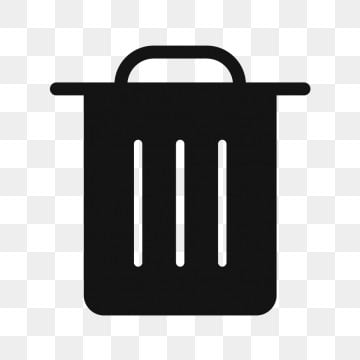
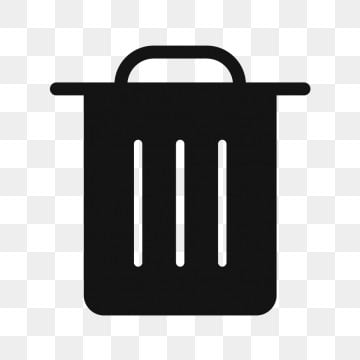
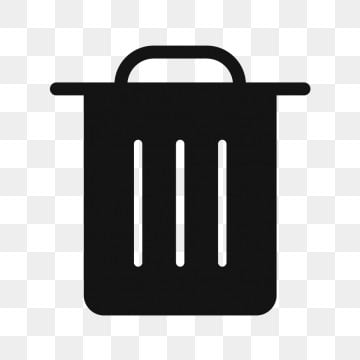
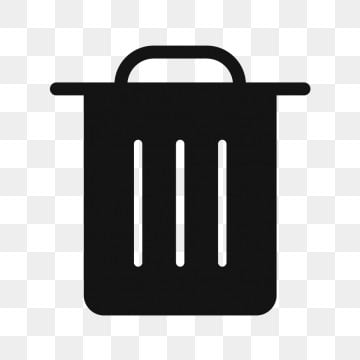
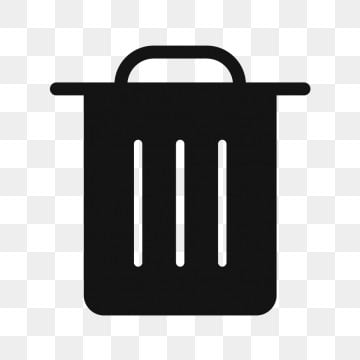
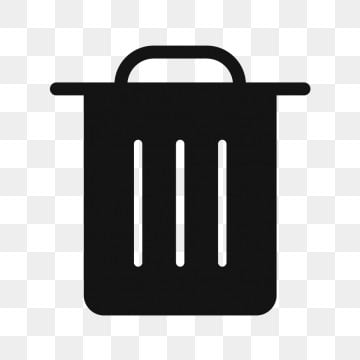
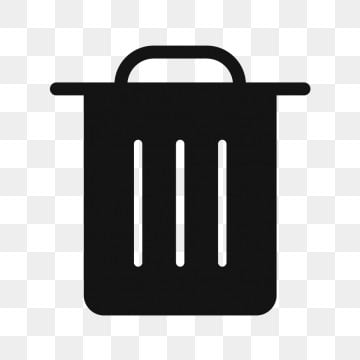
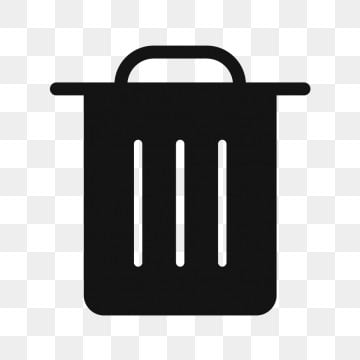
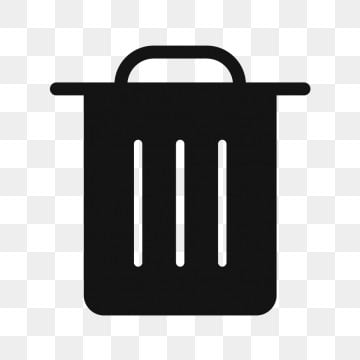
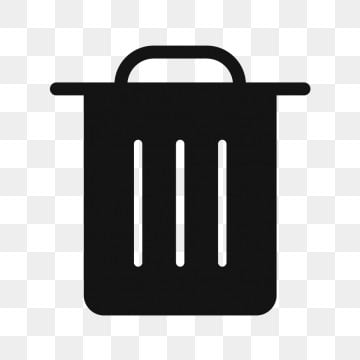
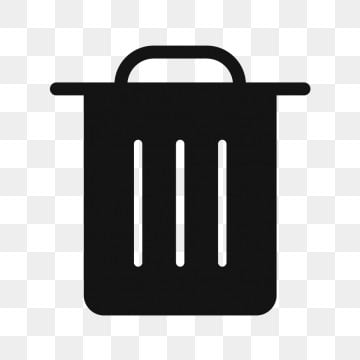
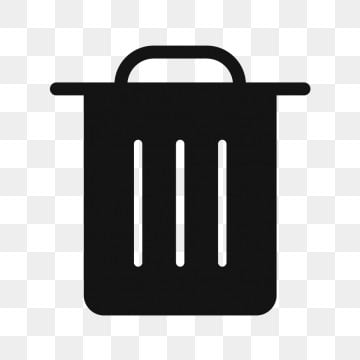
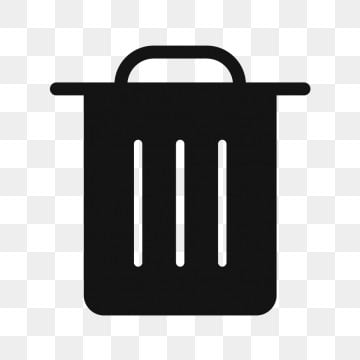
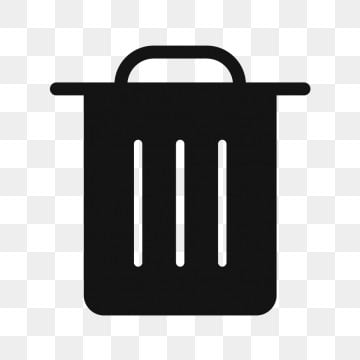
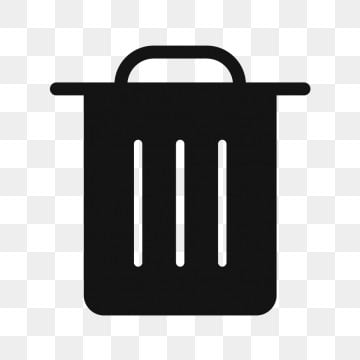
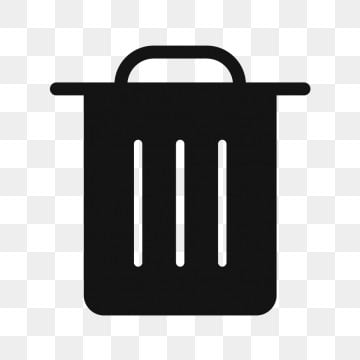
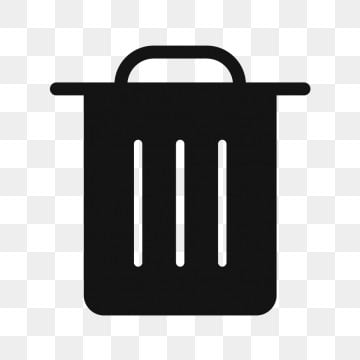
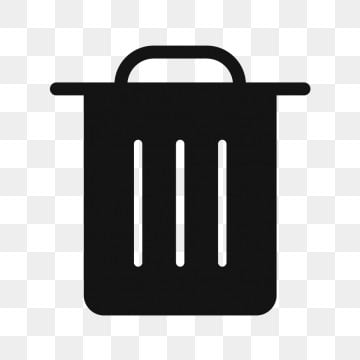
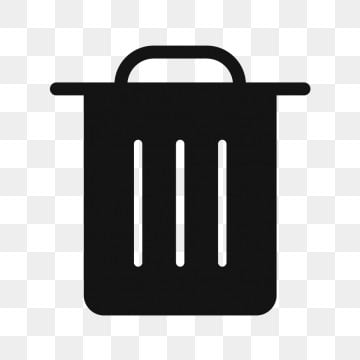
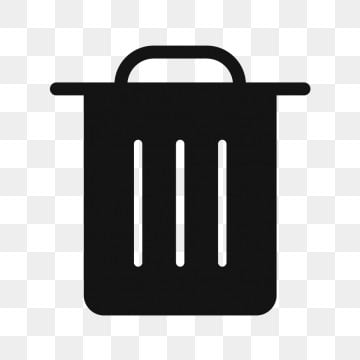
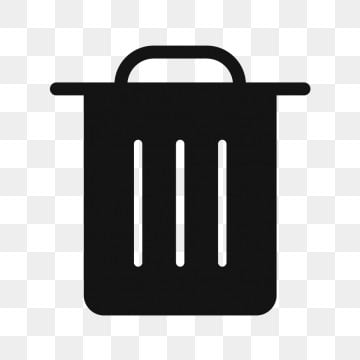
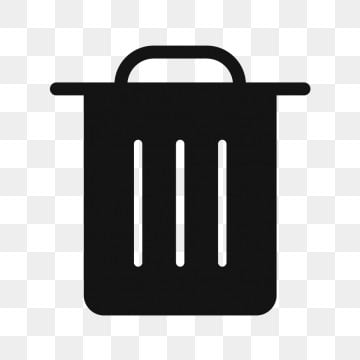
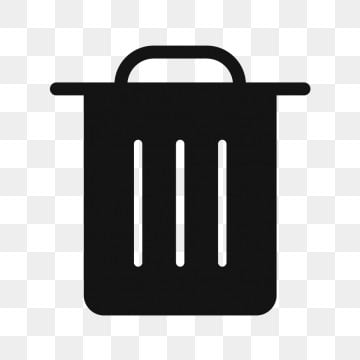
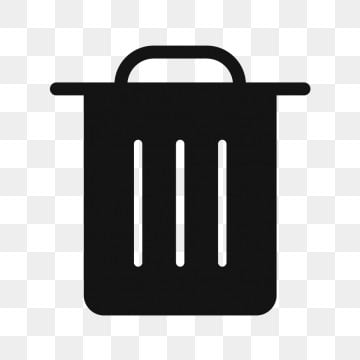
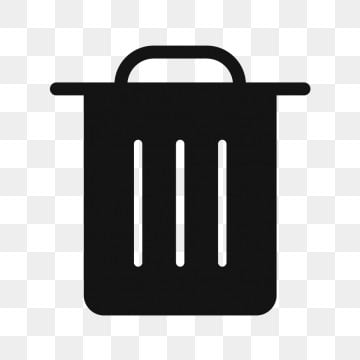
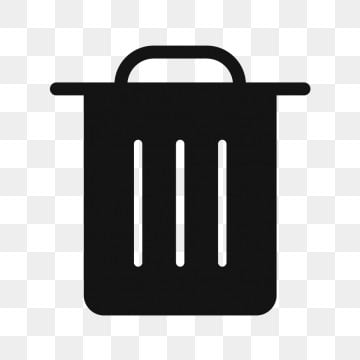
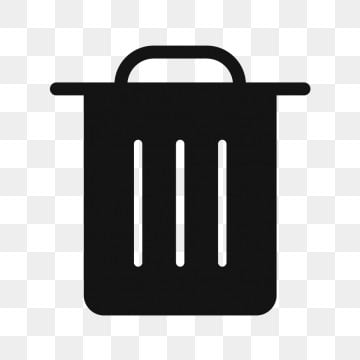
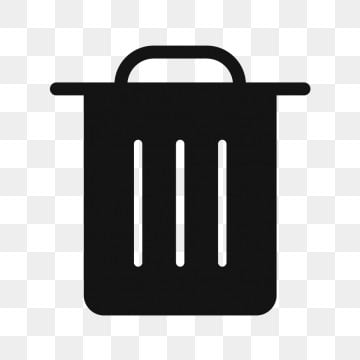
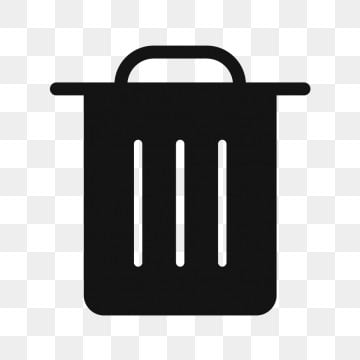
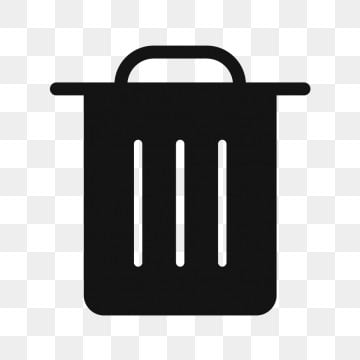
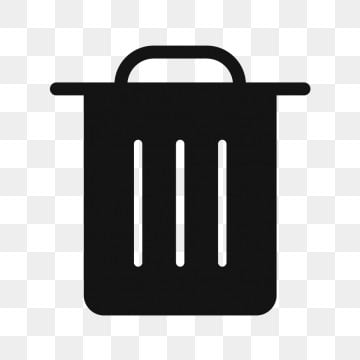
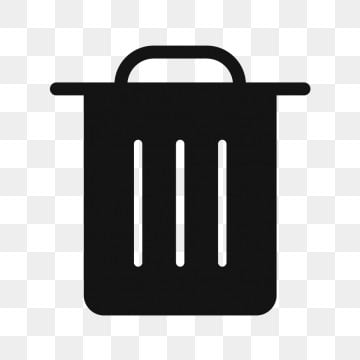
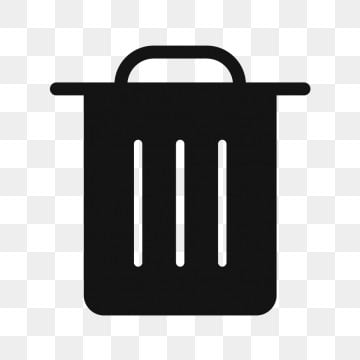
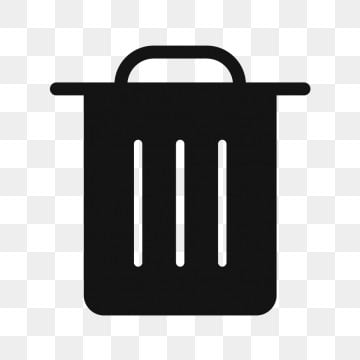
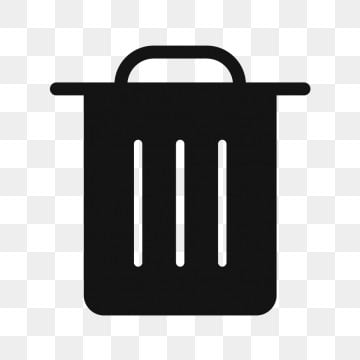
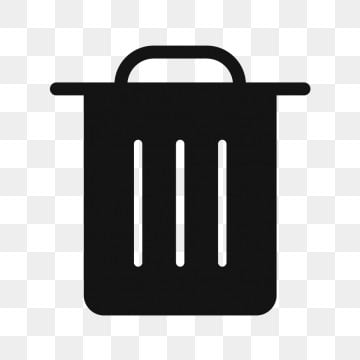
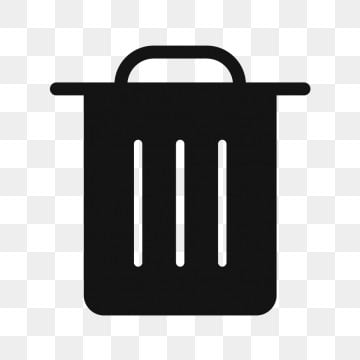
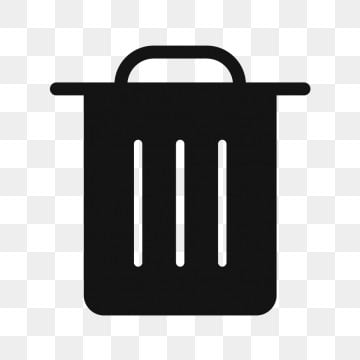
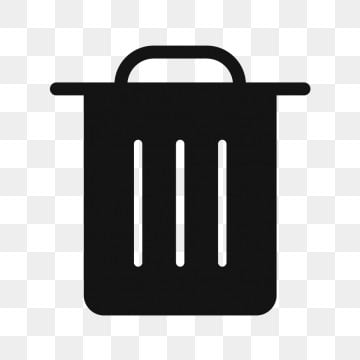
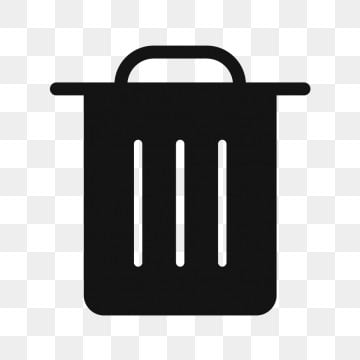
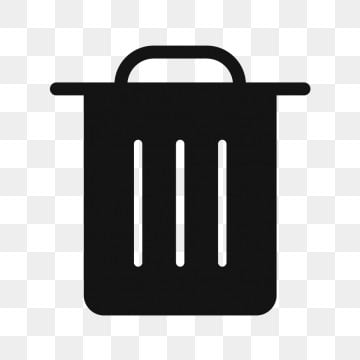
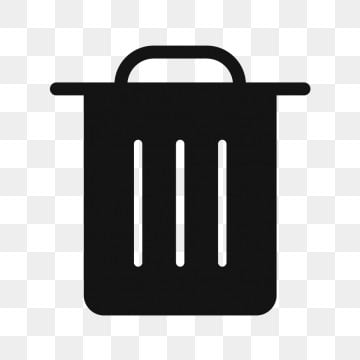
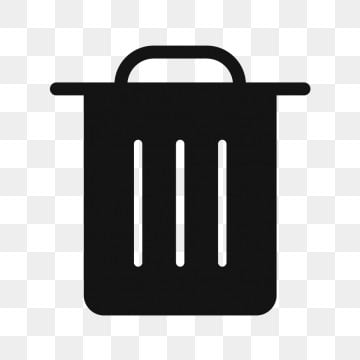
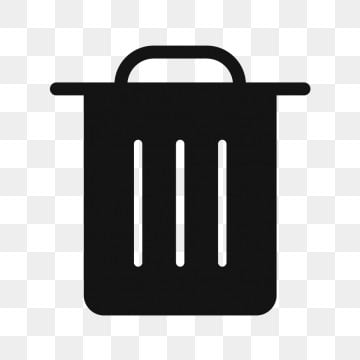
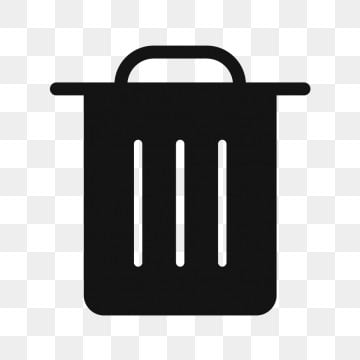
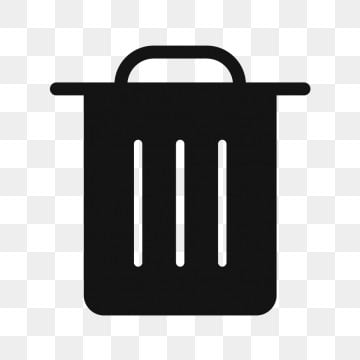
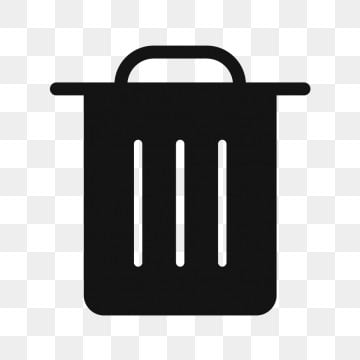
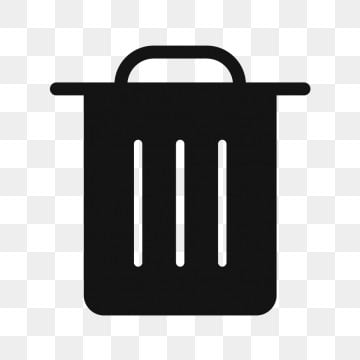
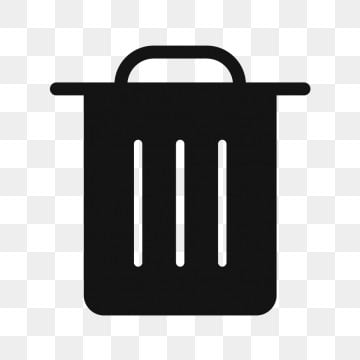
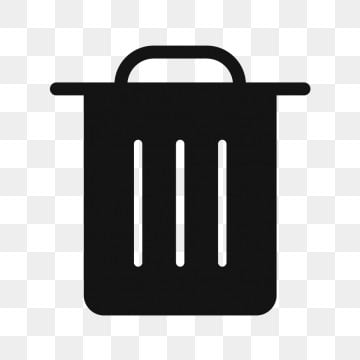
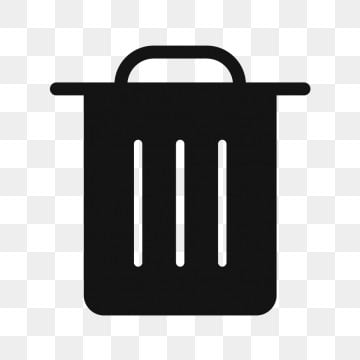
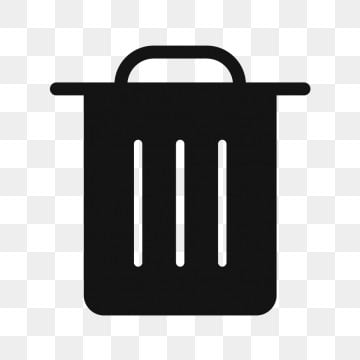
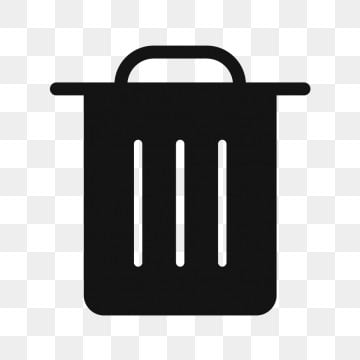
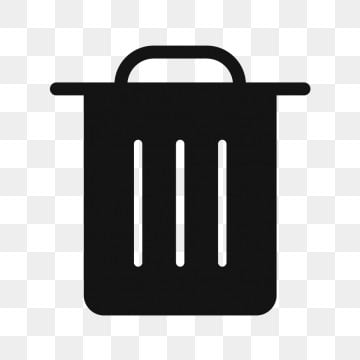
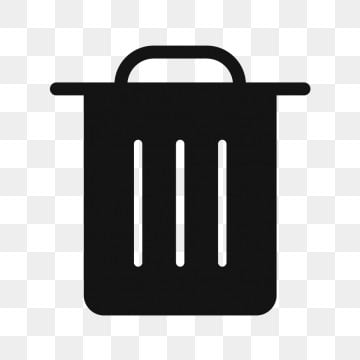
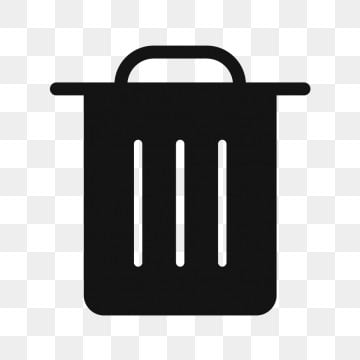
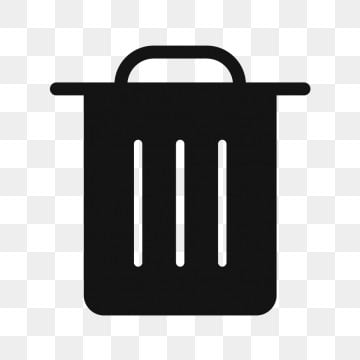
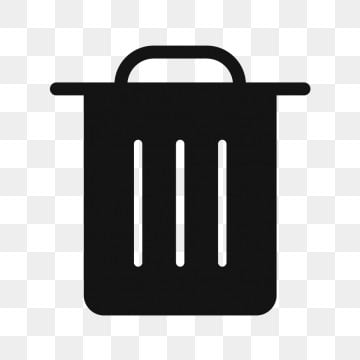
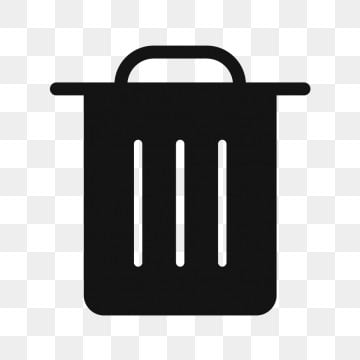
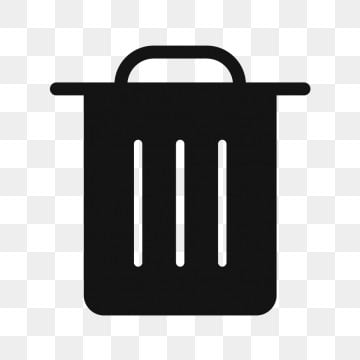
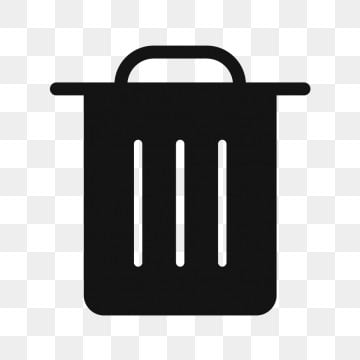
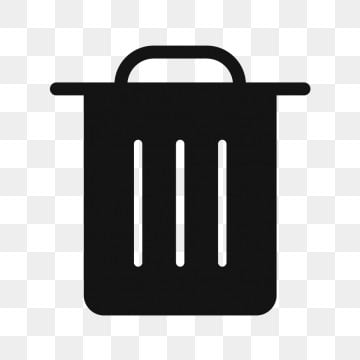
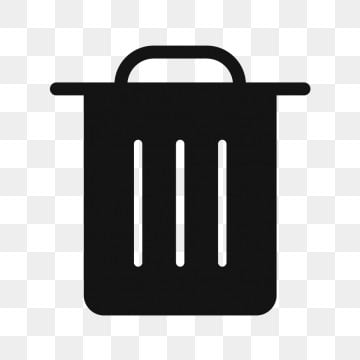
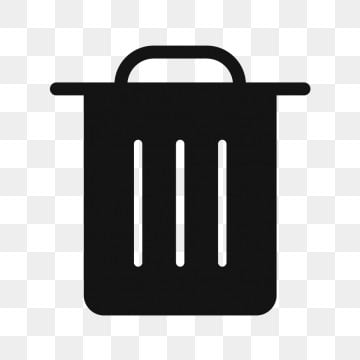
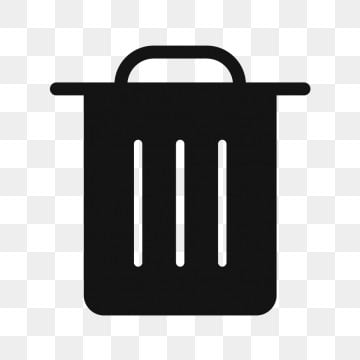
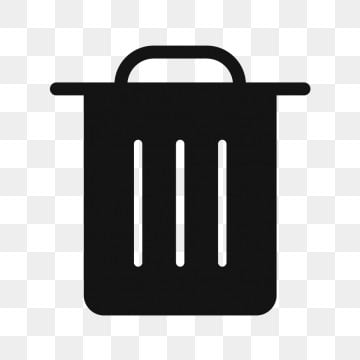
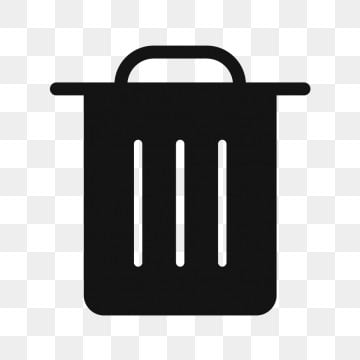
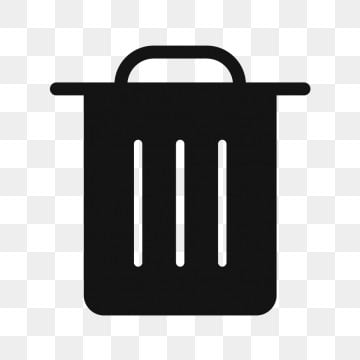
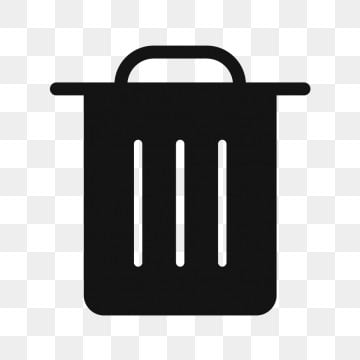
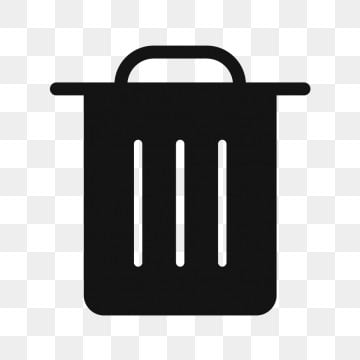
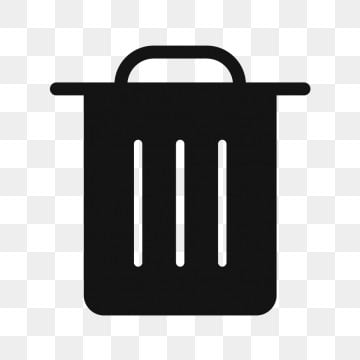

In [10]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
import json
from folium.plugins import MarkerCluster

#geojson 파일 불러오기
seoul_geo = json.load(open('D:/Task/Rawdata/HangJeongDong_ver20230701.geojson',encoding='utf8'))
seoul_geo['features'] = seoul_geo['features'][:17] # 서울 :424
seoul_geo


#전처리 작업
# df_result.loc[9,'행정동명'] = '종로1·2·3·4가동'
# df_result.loc[10,'행정동명'] = '종로5·6가동'
# df_result['행정동'] = '종로구 '+df_result['행정동명']
# df_result
df_result = pd.read_excel('D:/Task/Rawdata/meanpopulation_jongro.xlsx')
df_result
#행정동별 평균 생활인구수 지도에 적용시키기
m_trash = folium.Map(['37.5735042429813', '126.978989954189'], zoom_start=15)
fmap = folium.Choropleth(geo_data = seoul_geo,
                         data = df_result,
                         columns=['행정동명','평균생활인구수'],
                         key_on='feature.properties.temp',fill_color='BuPu',
                         fill_opacity=0.7, line_opacity=0.3,
                         legend_name = '생활인구수',
                         highlight = True
                        ).add_to(m_trash)

#쓰레기데이터 지도에 띄우기
trash = pd.read_csv('D:/Task/Rawdata/trash_tool.csv', encoding='euc-kr')
trash.rename(columns={'세부 위치(상세 주소)':'주소'},inplace=True)
trash.rename(columns={'수거 쓰레기 종류(일반 쓰레기 / 재활용 쓰레기)':'종류'},inplace=True)
icon_img = 'D:/Task/image/garbage.jpg'


#folium.MarkerCluster 주변지역을 묶어서 대략적인 개수 분포를 볼 수 있다.
mc = MarkerCluster()
for i, row in trash.iterrows():
    mc.add_child(folium.Marker(location=[row['x좌표'], row['y좌표']],
                               radius=2,
                               icon=folium.features.CustomIcon(icon_img, icon_size=(20, 20)),
                               popup=str(trash.loc[i, '주소']) + ' ' + str(trash.loc[i, '종류'])))

m_trash.add_child(mc)
m_trash

종로구 지하철 주소 데이터

In [1]:
# 지하철역 지도에 띄우기
import pandas as pd
import folium

#이미지 파일 지정
icon_img = 'D:/Task/image/sub2.png'

#종로 한정으로 전처리 필요함
jongro = folium.Map(location=[37.596854, 126.977890], zoom_start=14)
seoul_map = pd.read_csv('D:/Task/Rawdata/subway.csv', encoding='euc-kr')
seoul_map.head()

#필요한 열만 추출
seoul_map = seoul_map.loc[:,:'경도']
seoul_map = seoul_map.set_index('역명', drop=True, append=False)
seoul_map

#종로구 내 역 이름, 글자 전처리
station = ['독립문역', '경복궁역', 
            '안국역', '종각역', '종로3가역', '종로5가역', 
           '동대문역', '혜화역', '동묘앞역', '안국역', '광화문']

jongro_station = []

for s in station:
    jongro_station.append(s.replace('역',''))

# jongro_station 리스트에 있는 역 이름으로 seoul_map 데이터프레임에서 행 추출
selected_stations = seoul_map.loc[jongro_station]
selected_stations.to_csv('D:/Task/Rawdata/final_station.csv', encoding='utf8')                                        
# 종로구 내 역만 표시
for city in range(len(selected_stations)):
    folium.Marker([selected_stations.iloc[city]['위도'], selected_stations.iloc[city]['경도']],
                  icon = folium.features.CustomIcon(icon_img, icon_size=(20,20)), 
                  popup= selected_stations.index[city] + str(int(selected_stations.iloc[city]['호선'])) +'호선').add_to(m_trash)
# jongro.save('D:/Task/test2.html')
m_trash
# selected_stations

NameError: name 'm_trash' is not defined


독립문역 : 종로구 통일로 지하247 (무악동 101)
경복궁역 : 종로구 사직로 지하130 (적선동 81-1) 
서대문역 : 서대문구 통일로 126 (충정로2가 210번지)
안국역 : 종로구 율곡로 지하62 (안국동 148)
종각역 : 종로구 종로 지하55 (종로1가 54)
종로3가역 : 종로3가
종로5가역 : 종로구 종로 지하216 (종로5가 124)
동대문역 : 종로구 종로 지하302
혜화역 : 종로구 대학로 120
동묘앞역 : 종로구 종로 지하359 (숭인동 117)
신설동역 : 동대문구 왕산로 지하1
안국역 : 종로구 율곡로 지하62 (안국동 148)
광화문역 : 종로구 세종대로 지하172 (세종로 1-68) 

버스 정류장 데이터(카카오API사용)

In [23]:
# 카카오API를 사용하여 좌표->주소 변환
import requests, json, pprint
import pandas as pd
import re

def get_address(lat, lng):
    url = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x="+lng+"&y="+lat
    # 'KaKaoAK '는 그대로 두시고 개인키만 입력해 주세요.
    # ex) KakaoAK 6af8d4826f0e56c54bc794fa8a294
    headers = {"Authorization": "KakaoAK 651b5a5e6a1e26cc5b7c817a2c2f1d30"}
    api_json = requests.get(url, headers=headers)
    full_address = json.loads(api_json.text)
    adr = full_address['documents'][0]['address_name']

    return adr

bus = pd.read_csv('D:/Task/Rawdata/bus_station_jongro.csv', encoding='euc-kr')

pattern = "[..구]"

#행정동만 따로 추출
dong = []
for i in bus['주소']:
    a = re.split(pattern, i)
    dong.append(a[1])
    
bus['dong'] = dong
bus
bus.to_csv('D:/Task/Rawdata/bus_station_jongro2.csv', encoding='euc-kr')

# for index, row in df.iterrows():
#     lat = str(row['Y좌표'])
#     lng = str(row['X좌표'])
#     address = get_address(lat, lng)
#     full_adr = row['address_name']
#     addresses.append(address)
#     addresses.append(full_adr)

# addresses
# df['주소'] = addresses 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



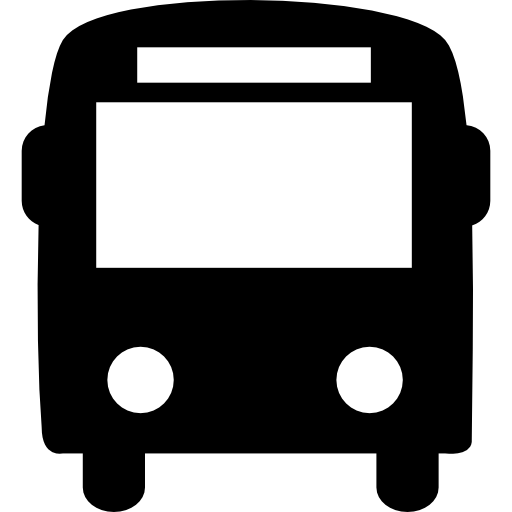

In [18]:
from geopy.geocoders import Nominatim
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

# 파일 
trash = pd.read_excel('D:/Task/Rawdata/processed_files/trash_final.xlsx')

# 클러스터링 결과를 데이터프레임에 추가
data_points = [(i,j) for i,j in zip(trash['x좌표'].values, trash['y좌표'].values)]
kmeans = KMeans(n_clusters=4).fit(data_points)
kmean_centers = kmeans.cluster_centers_
column_name = ['위도', '경도']
new_trash = pd.DataFrame(data_points, columns=column_name)
new_trash['cluster_id'] = kmeans.labels_
new_trash = new_trash.reset_index(drop=True)
trash = pd.concat([trash, new_trash], axis=1)
trash = trash.drop(['x좌표', 'y좌표'], axis=1)
trash.to_excel('D:/Task/Rawdata/processed_files/trash_with_dong.xlsx')
colors = ['red', 'green', 'blue', 'orange']

# 지도 초기 위치 설정 (위도, 경도 중심점 설정)
map_center = [trash['위도'].mean(), trash['경도'].mean()]

#geojson 파일 불러오기
seoul_geo = json.load(open('D:/Task/Rawdata/HangJeongDong_ver20230701.geojson',encoding='utf8'))
seoul_geo['features'] = seoul_geo['features'][:17] # 서울 :424
df_result = pd.read_excel('D:/Task/Rawdata/processed_files/meanpopulation_jongro_final.xlsx')

m = folium.Map(location = ['37.5735042429813', '126.978989954189'], zoom_start=15)
fmap = folium.Choropleth(geo_data = seoul_geo,
                         data = df_result,
                         columns=['행정동','평균생활인구수'],
                         key_on='feature.properties.temp',fill_color='BuPu',
                         fill_opacity=0.7, line_opacity=0.3,
                         legend_name = '생활인구수',
                         highlight = True
                        ).add_to(m)

# # 클러스터별로 데이터 포인트를 Folium CircleMarker로 추가
# for cluster_id, color in zip(set(trash['cluster_id']), colors):
#     cluster_points = trash[trash['cluster_id'] == cluster_id]
#     for idx, row in cluster_points.iterrows():
#         folium.CircleMarker(
#             location=[row['위도'], row['경도']],
#             radius=5,
#             color=color,
#             fill=False,
            
#             fill_opacity=0.7,
#             popup=f"{row['세부 위치(상세 주소)']}의 {row['수거 쓰레기 종류(일반 쓰레기 / 재활용 쓰레기)']}"
#         ).add_to(m)
        
# #클러스터 중심점을 Folium Marker로 추가
# for center in kmean_centers:
#     folium.Marker(
#         location=center,
#         icon=folium.Icon(color='black'),
#         popup='Cluster Center'
#     ).add_to(m)

# #쓰레기데이터 지도에 띄우기
# trash = pd.read_csv('D:/Task/Rawdata/trash_tool.csv', encoding='euc-kr')
# trash.rename(columns={'세부 위치(상세 주소)':'주소'},inplace=True)
# trash.rename(columns={'수거 쓰레기 종류(일반 쓰레기 / 재활용 쓰레기)':'종류'},inplace=True)
# icon_img = 'D:/Task/image/garbage.jpg'

# #folium.MarkerCluster 주변지역을 묶어서 대략적인 개수 분포를 볼 수 있다.
# mc = MarkerCluster()
# for i, row in trash.iterrows():
#     mc.add_child(folium.Marker(location=[row['x좌표'], row['y좌표']],
#                                radius=400,
#                                icon=folium.features.CustomIcon(icon_img, icon_size=(20, 20)),
#                                popup=str(trash.loc[i, '주소']) + ' ' + str(trash.loc[i, '종류'])))

# m.add_child(mc)
#버스정류장데이터 지도에 띄우기
bus_map = pd.read_csv('D:/Task/Rawdata/bus_station_jongro.csv', encoding='euc-kr')
test = bus_map
test

# Define the path to your custom icon image file
icon_path = 'D:/Task/image/front-of-bus.png'

# Create a custom icon using the icon image file
custom_icon = folium.features.CustomIcon(icon_image=icon_path, icon_size=(1000, 1000))  

# Add a marker with the custom icon
for i in range(len(test)):
    folium.Marker(
    location=[test.loc[i]['X좌표'], test.loc[i]['Y좌표']],
    popup='Custom Icon Marker',
    icon=custom_icon
).add_to(m)

m


상권 데이터(종로구 상권)

In [3]:
import pandas as pd
import folium
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 파일 경로
# csv_file_path = 'D:/Task/Rawdata/seoul_business.csv'
# image_path = 'D:/mee.jpg'

# # 파일 읽기
# try:
#     business_data = pd.read_csv(csv_file_path, encoding='UTF-8')
# except FileNotFoundError:
#     print(f"File '{csv_file_path}' not found.")
#     exit()

# # 필요한 열 선택
# business = business_data[['상호명', '지점명', '도로명', '경도', '위도']]
# business = business[business['도로명'].str.contains('종로구')]
# business = business.reset_index(drop=True,inplace=True)

# business.to_csv('D:/Task/Rawdata/processed_files/business_final.csv', encoding='utf8')
# business.to_excel('D:/Task/test.xlsx')


# 지도 생성
# m = folium.Map(location=[37.596854, 126.977890], zoom_start=10)

# # 데이터프레임 순회
# for _, row in business.iterrows():
#     folium.Marker(
#         location=[row['위도'], row['경도']],
#         radius=100,
#         color='#000000',
#         fill='crimson',
#         # icon=folium.features.CustomIcon(image_path, icon_size=(30, 30))
#     ).add_to(m)

# # 지도 저장
# map_save_path = 'custom_icon_map.html'
# m.save(map_save_path)
# print(f"Map saved to '{map_save_path}'.")

# sns.lmplot(x='경도', y='위도', data = business, fit_reg=False)

AttributeError: 'NoneType' object has no attribute 'head'

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\User\AppData\Local\Program

KeyError: 'cluster_id'

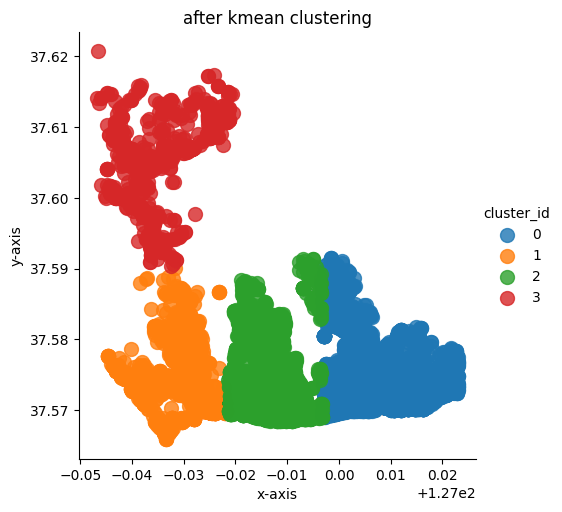

In [23]:
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
import pandas as pd
import folium
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
kmeans = KMeans 
business = pd.read_excel('D:/Task/Rawdata/processed_files/seoul_business.xlsx')
# business['cluster_id'] = kmeans.labels_


#상권데이터 위경도별 clustering
data_points = [(i, j) for i,j in zip(business['경도'].values, business['위도'].values)]
data_points
kmeans = KMeans(n_clusters=4).fit(data_points)
kmeans.labels_
kmeans.cluster_centers_
column_name = ['위도', '경도']
new_df = pd.DataFrame(data_points, columns=column_name)
new_df
new_df['cluster_id'] = kmeans.labels_
new_df = new_df.reset_index(drop=True)

# 4. 클러스터링까지 포함하는 df를 시각화하기
# 사본으로 시각화하는데, hue옵션을 주어 특정 칼럼에 따른 색 구분시키기
sns.lmplot(x='위도', y='경도', data=new_df, fit_reg=False, scatter_kws={'s': 100}, hue='cluster_id')
plt.title('after kmean clustering')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# kmeans.cluster_centers_  
#     array([[126.96445384,  37.60429579],
#        [126.98710868,  37.573923  ],
#        [127.00619255,  37.57412289],
#        [126.97004916,  37.57542657]])
# new_df
# business


#folium.MarkerCluster 주변지역을 묶어서 대략적인 개수 분포를 볼 수 있다.
map = folium.Map(location=[37.596854, 126.977890], zoom_start=12)
mc = MarkerCluster()

for _, row in business.iterrows():
    mc.add_child(folium.Marker(location=[row['위도'], row['경도']],
                               radius=2,
                               popup=row['상호명'] + '-' + str(row['지점명'])))

map.add_child(mc)
map

map_clu = folium.Map(location = [37.596854, 126.977890], zoom_start=12)
for n in business.index:
    popup_name = business.loc[n, '상호명'] + '-' + str(business.loc[n, '지점명'])
    if business.loc[n, 'cluster_id'] == 1:
        icon_color = 'blue'
    elif business.loc[n, 'cluster_id'] == 2:
        icon_color = 'red'
    elif business.loc[n, 'cluster_id'] == 3:
        icon_color = 'green'
    else:
        icon_color = 'yellow'
    
    folium.features.CircleMarker(
        location = [business.loc[n,'위도'], business.loc[n, '경도']], 
        radius = 2,
        popup = popup_name,
        color = icon_color,
        fill = True,
        fill_color = icon_color
    ).add_to(map_clu)

map_clu

# folium.features.CircleMarker(
#         location = kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#         radius = 2,
#         popup = '중점',
#     ).add_to(map)
# map
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# 파일 경로
# csv_file_path = 'D:/Task/Rawdata/seoul_business.csv'
# image_path = 'D:/mee.jpg'

# # 필요한 열 선택
# business = business_data[['상호명', '지점명', '도로명', '경도', '위도']]
# business = business[business['도로명'].str.contains('종로구')]
# business = business.reset_index(drop=True)

# # 상권데이터 위경도별 clustering
# data_points = [(i, j) for i, j in zip(business['경도'].values, business['위도'].values)]
# kmeans = KMeans(n_clusters=4).fit(data_points)

# # 클러스터링 결과를 데이터프레임에 추가
# business['cluster_id'] = kmeans.labels_

# # 클러스터링 결과 시각화
# plt.figure(figsize=(10, 6))

# # 클러스터링된 데이터를 색상으로 나타내기 위한 컬러맵 생성
# colors = plt.cm.Spectral(np.linspace(0, 1, len(set(business['cluster_id']))))

# # 클러스터별로 데이터 포인트를 scatter plot으로 시각화
# for cluster_id, color in zip(set(business['cluster_id']), colors):
#     cluster_points = business[business['cluster_id'] == cluster_id] #현재 반복 중인 cluster_id에 해당하는 데이터 포인트들을 선택하여 cluster_points에 저장합니다.
#     plt.scatter(cluster_points['경도'], cluster_points['위도'], color=color, label=f'Cluster {cluster_id}')

# # 클러스터 중심점 표시
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Cluster Centers')

# plt.title('K-means Clustering of Business Data')
# plt.xlabel('경도')
# plt.ylabel('위도')
# plt.legend()
# plt.show()

# # 상권 분류 뒤 중점지 위도, 경도 추출
# # print(kmeans.cluster_centers_[:, 0])
# # print(kmeans.cluster_centers_[:, 1])
# centers_business = [(i,j) for i, j in zip(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:, 1])]
# centers_business

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
business = pd.read_excel('D:/Task/Rawdata/processed_files/seoul_business.xlsx')
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)
k_means.fit(business['cluster_id'])
# business['cluster_id'].value_counts()
# cluster_counts = business['cluster_id'].value_counts()

# # 인덱스를 문자열로 변환하여 리스트로 저장
# cluster_names = [f'Cluster {idx}' for idx in cluster_counts.index]

# #클러스터링 별 행정동 이름 파악하기
cluster_0 = business[business['cluster_id'] == 0].도로명
# cluster_0.value_counts() #75, 평창문화로, 진흥로, 자하문로
cluster_1 = business[business['cluster_id'] == 1].도로명
# cluster_1.value_counts() #145, 종로, 삼일대로, 청계천로...
cluster_2 = business[business['cluster_id'] == 2].도로명
# cluster_2.value_counts() #220, 종로, 창경궁로, 청계천로...
cluster_3 = business[business['cluster_id'] == 3].도로명
# cluster_3.value_counts() #107, 자하문로, 새문안로, 사직로8길


cluster0 = cluster_0.value_counts()

# plt.bar(cluster0.index, cluster0.values)
# plt.xlabel('Cluster ID')
# plt.ylabel('Count')
# plt.title('Number of Businesses in Each Cluster')
# plt.show()
print(cluster0)
print(cluster1)
print(cluster2)
print(cluster3)




KeyError: 'cluster_id'

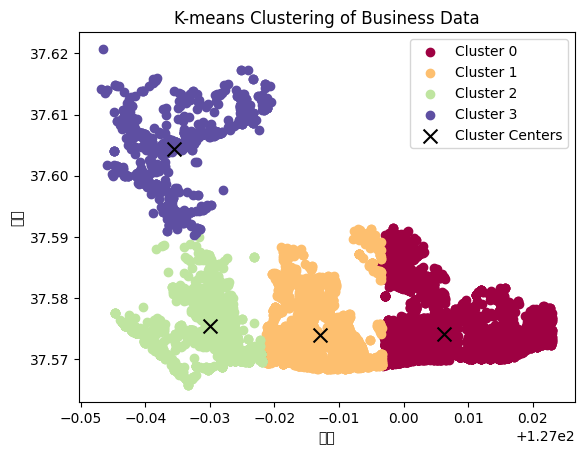

In [27]:
# import mclp
import numpy as np
import pandas as pd

# # 파일 불러오기
# business = pd.read_excel('D:/Task/Rawdata/processed_files/seoul_business.xlsx')

# # 상권데이터 위경도별 clustering
# data_points = [(i,j) for i,j in zip(business['경도'].values, business['위도'].values)]
# kmeans = KMeans(n_clusters=5).fit(data_points)

# # 파일 경로
# csv_file_path = 'D:/Task/Rawdata/seoul_business.csv'
# image_path = 'D:/mee.jpg'

# # 클러스터링 결과를 데이터프레임에 추가

# data_points = [(i,j) for i,j in zip(business['경도'].values, business['위도'].values)]
# kmeans = KMeans(n_clusters=4).fit(data_points)
# kmeans.cluster_centers_
# column_name = ['위도', '경도']
# new_df = pd.DataFrame(data_points, columns=column_name)
# new_df
# new_df['cluster_id'] = kmeans.labels_
# new_df = new_df.reset_index(drop=True)
# business['cluster_id'] = kmeans.labels_
# # 클러스터링 결과 시각화
# plt.figure(figsize=(10, 6))

# 클러스터링된 데이터를 색상으로 나타내기 위한 컬러맵 생성
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(business['cluster_id']))))

# 클러스터별로 데이터 포인트를 scatter plot으로 시각화
for cluster_id, color in zip(set(business['cluster_id']), colors):
    cluster_points = business[business['cluster_id'] == cluster_id] #현재 반복 중인 cluster_id에 해당하는 데이터 포인트들을 선택하여 cluster_points에 저장합니다.
    plt.scatter(cluster_points['경도'], cluster_points['위도'], color=color, label=f'Cluster {cluster_id}')

# 클러스터 중심점 표시
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Cluster Centers')

plt.title('K-means Clustering of Business Data')
plt.xlabel('경도')
plt.ylabel('위도')
plt.legend()
plt.show()

# 상권 분류 뒤 중점지 위도, 경도 추출
# print(kmeans.cluster_centers_[:, 0])
# print(kmeans.cluster_centers_[:, 1])
# for cluster_id, color in zip(set(business['cluster_id']), colors):
#     cluster_points = business[business['cluster_id'] == cluster_id] #현재 반복 중인 cluster_id에 해당하는 데이터 포인트들을 선택하여 cluster_points에 저장합니다.
#     plt.scatter(cluster_points['경도'], cluster_points['위도'], color=color, label=f'Cluster {cluster_id}')


### 쓰레기통 clustering

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



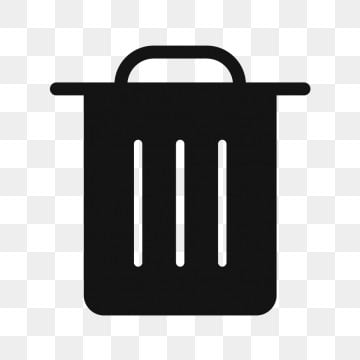
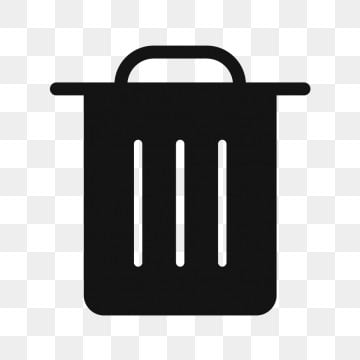
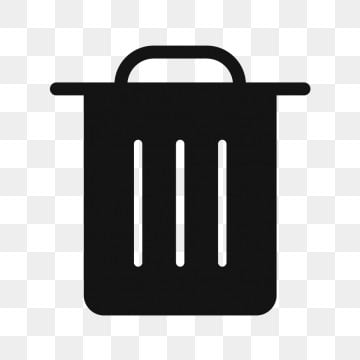
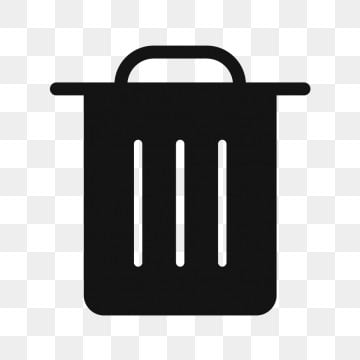
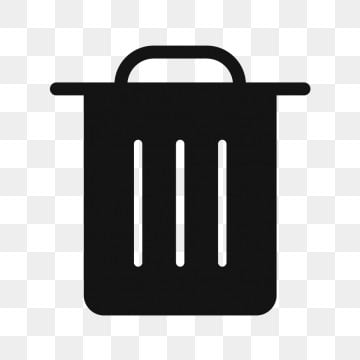
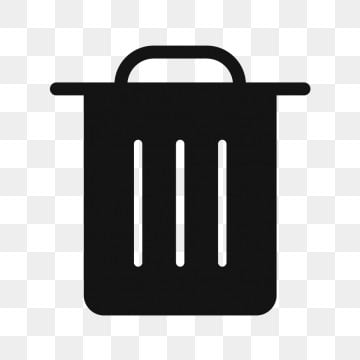
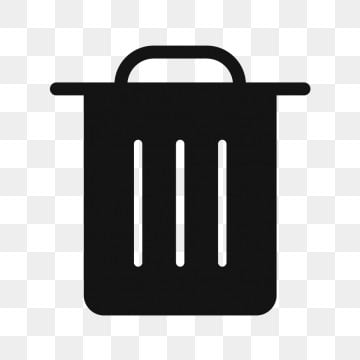
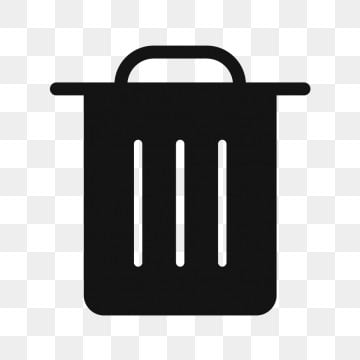
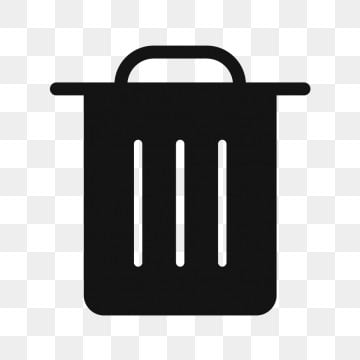
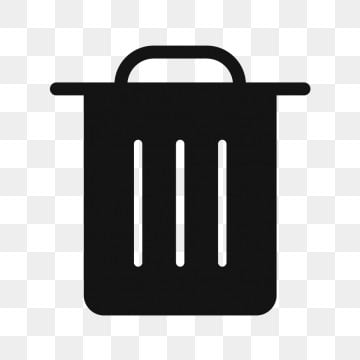
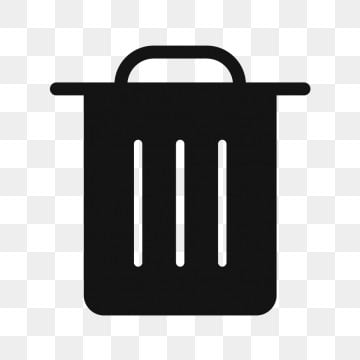
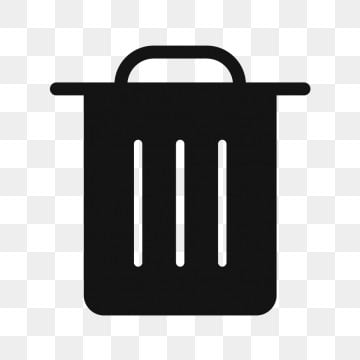
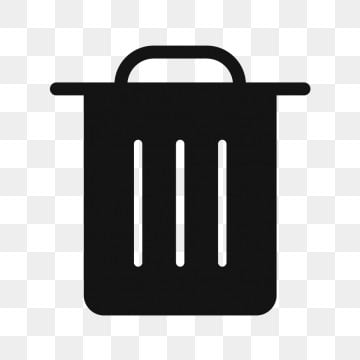
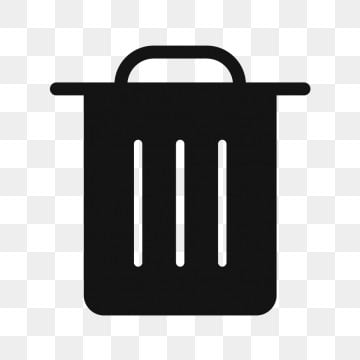
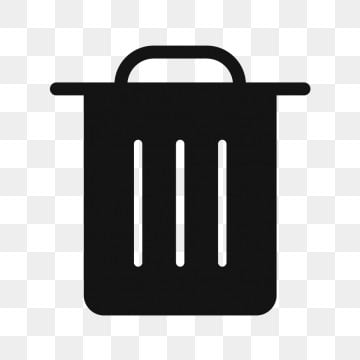
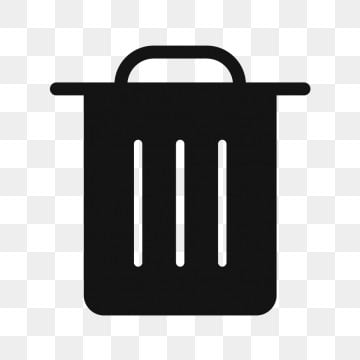
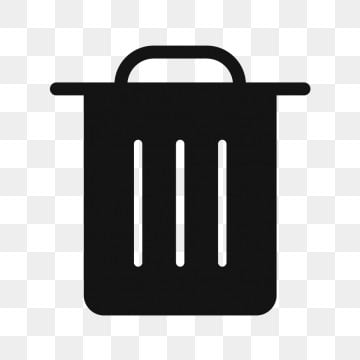
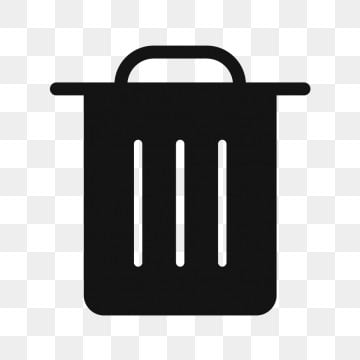
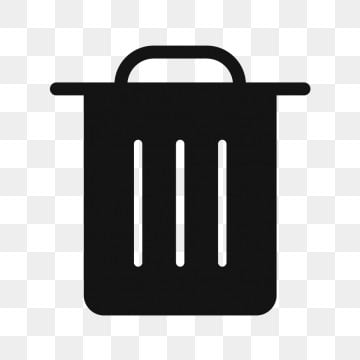
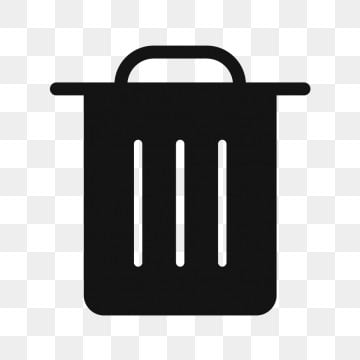
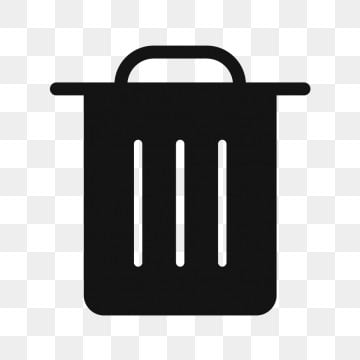
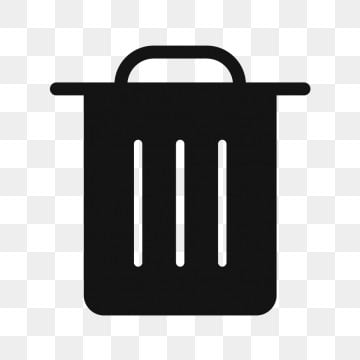
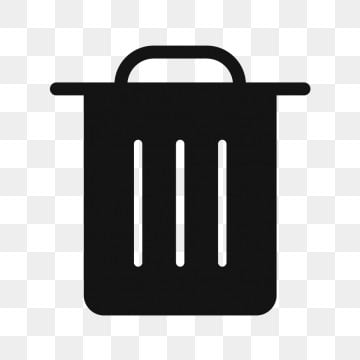
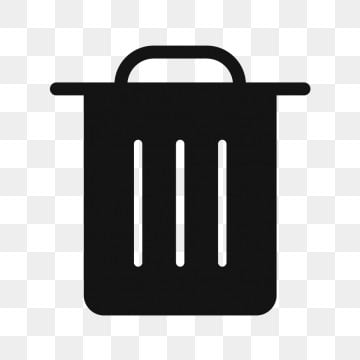
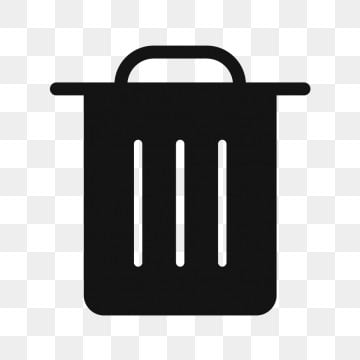
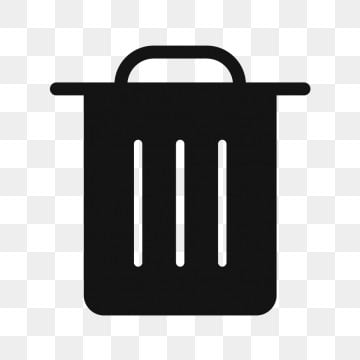
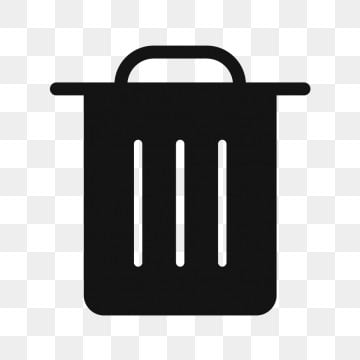
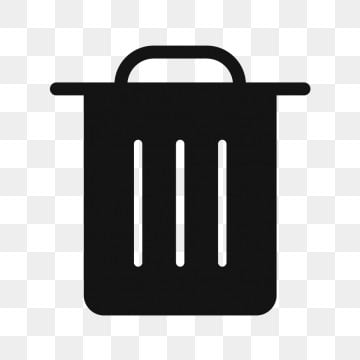
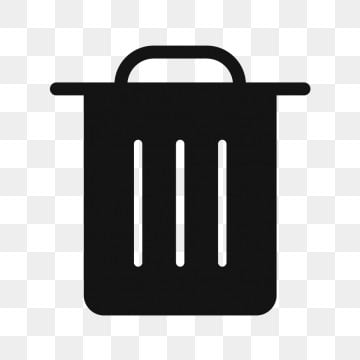
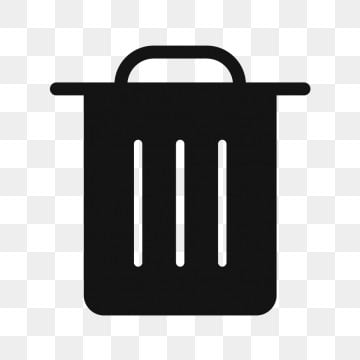
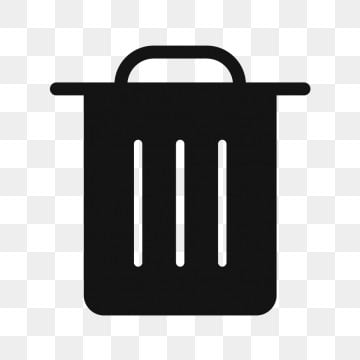
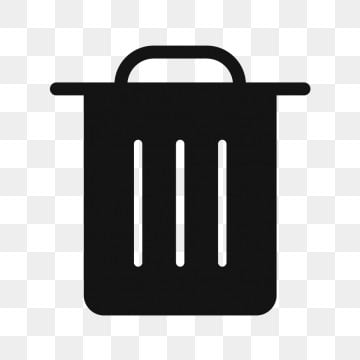
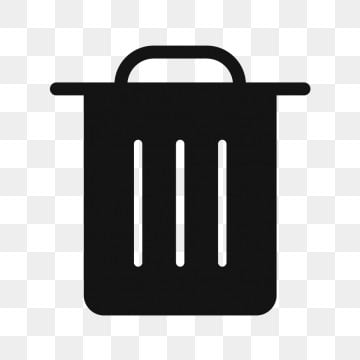
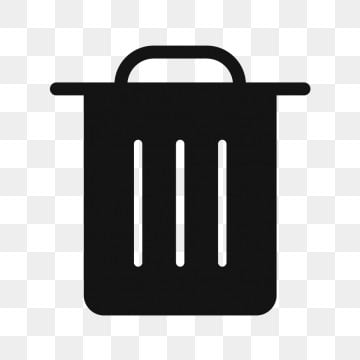
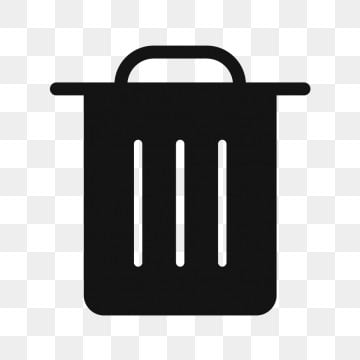
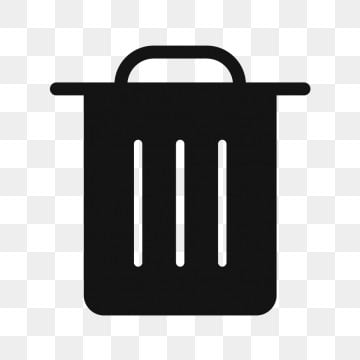
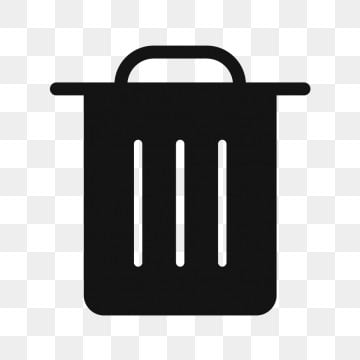
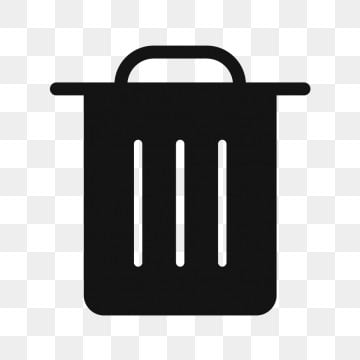
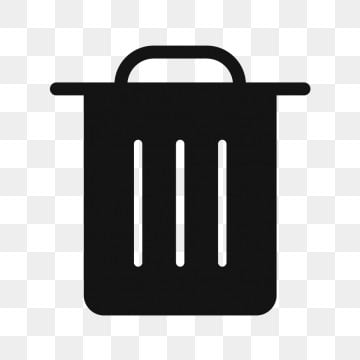
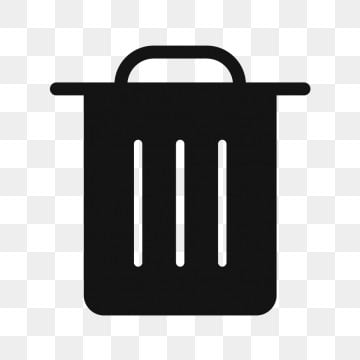
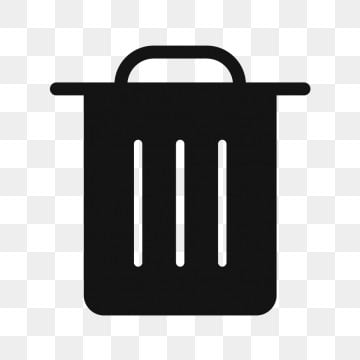
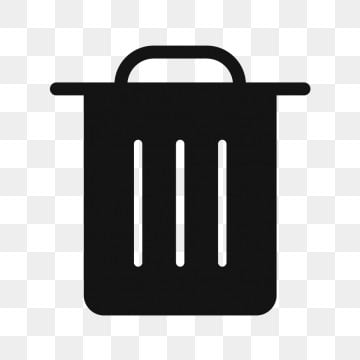
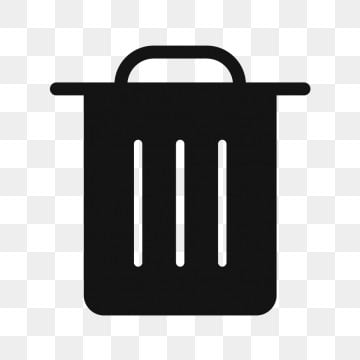
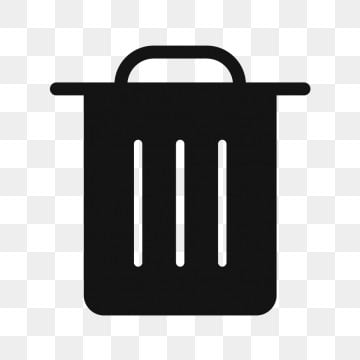
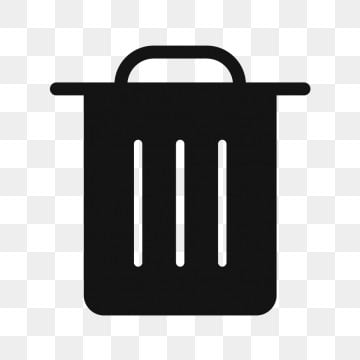
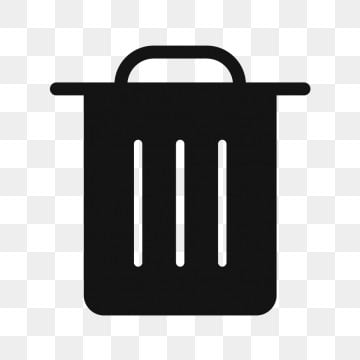
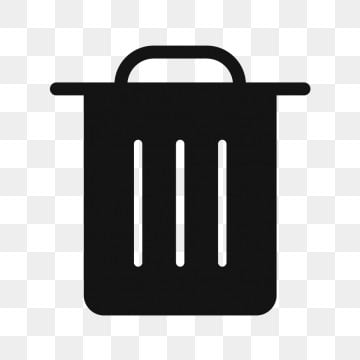
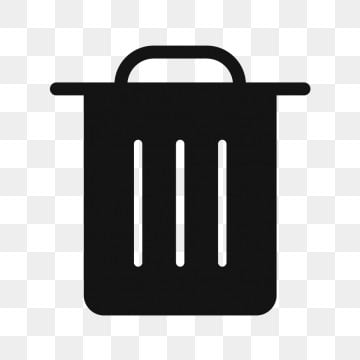
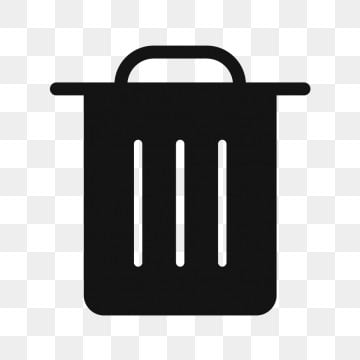
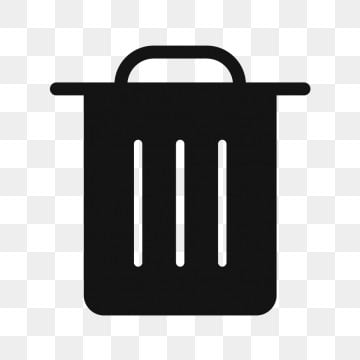
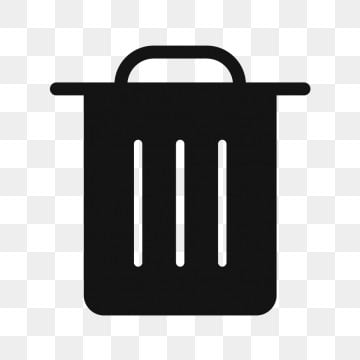
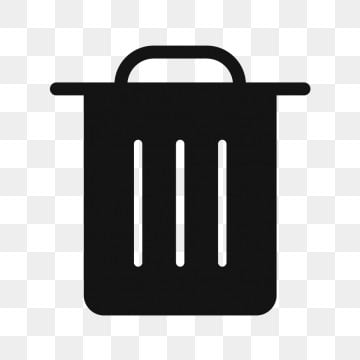
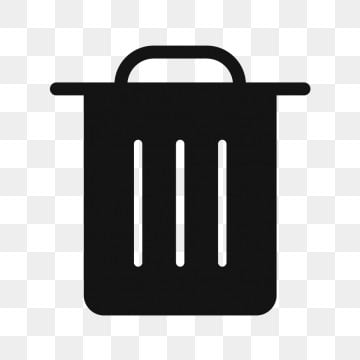
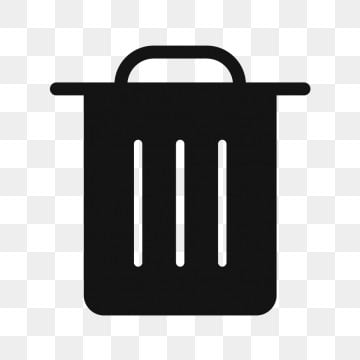
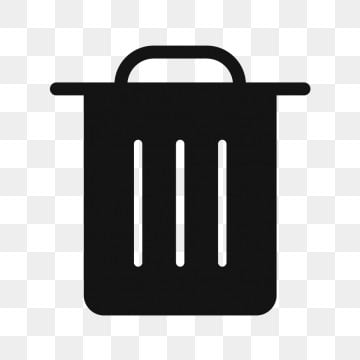
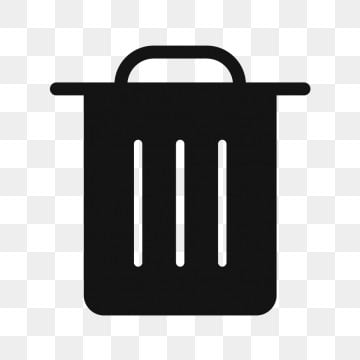
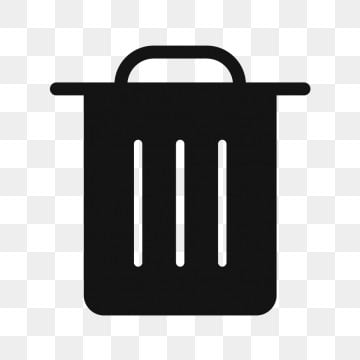
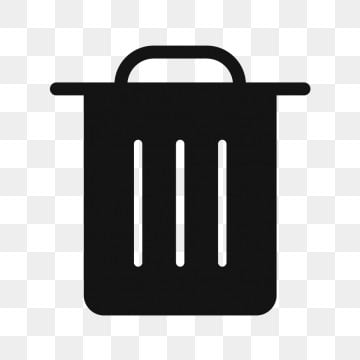
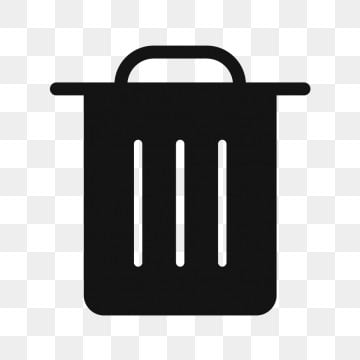
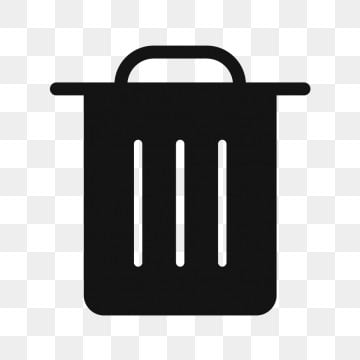
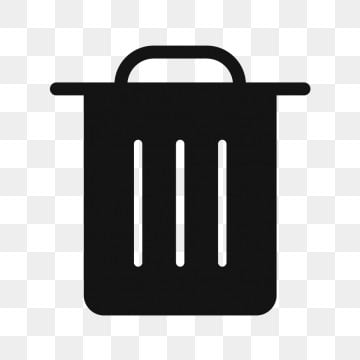
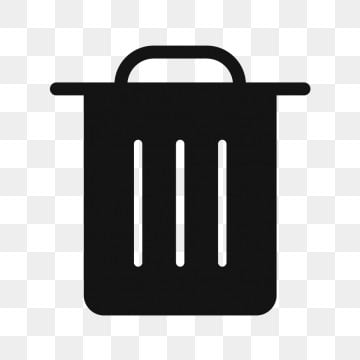
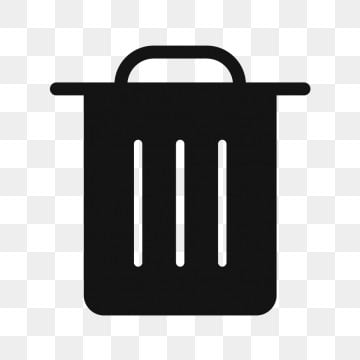
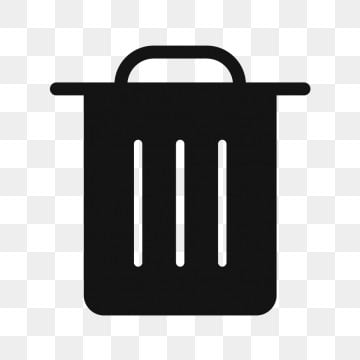
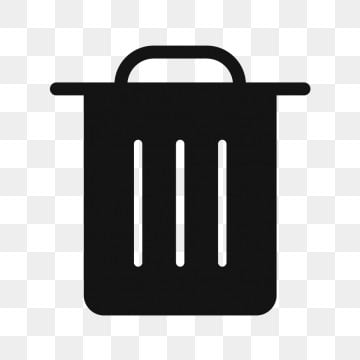
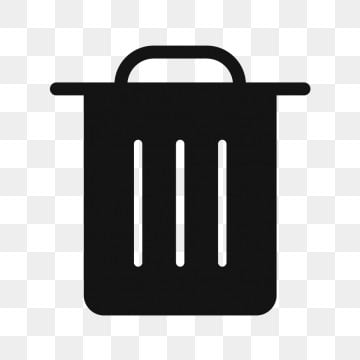
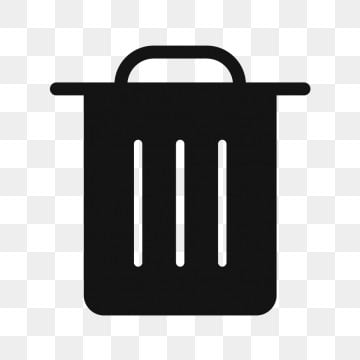
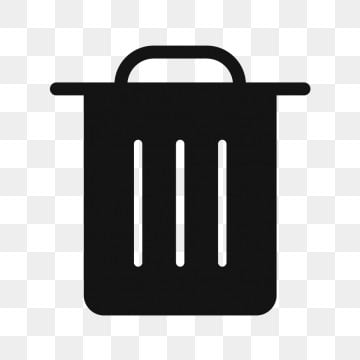
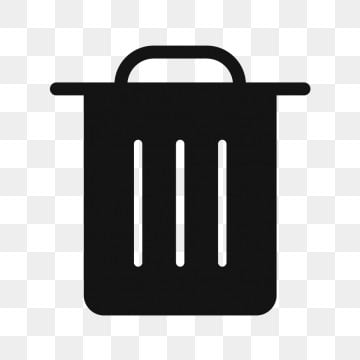
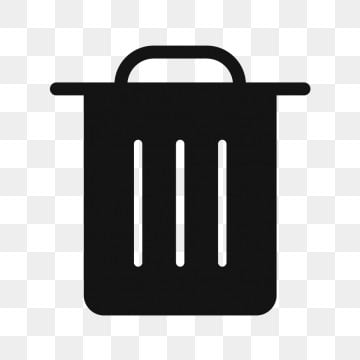
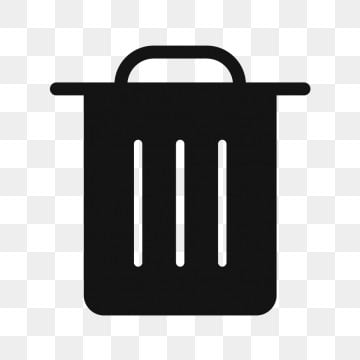
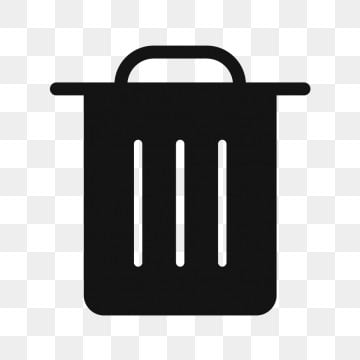
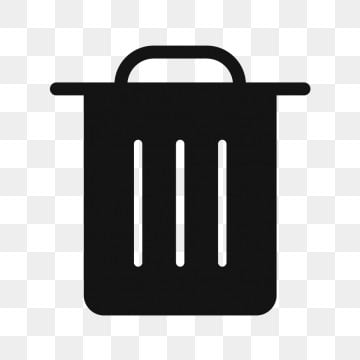
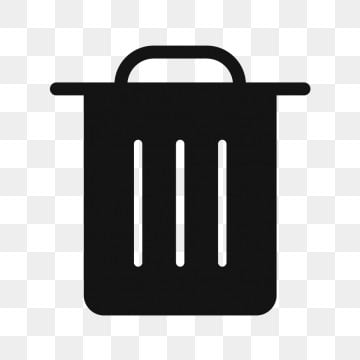
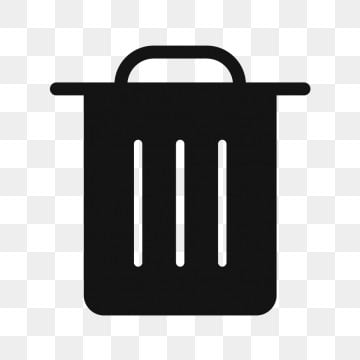
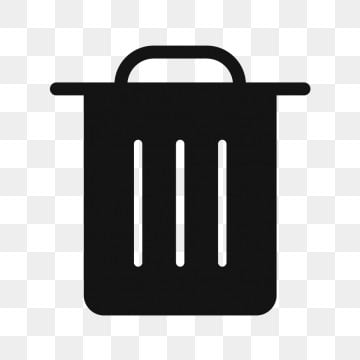
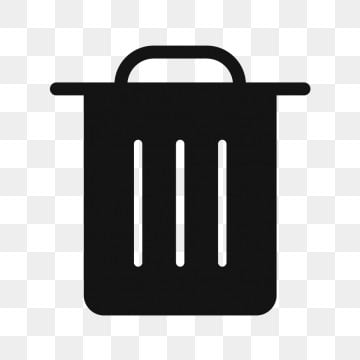
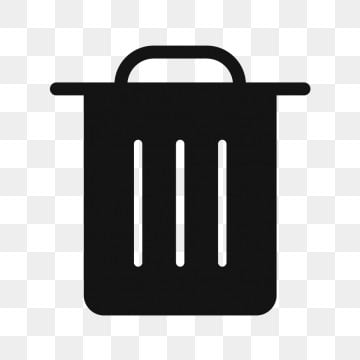
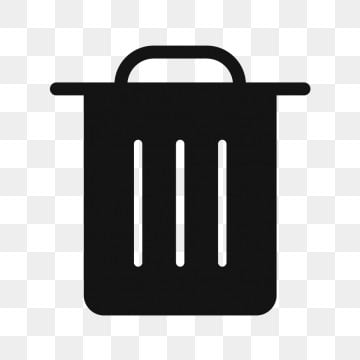
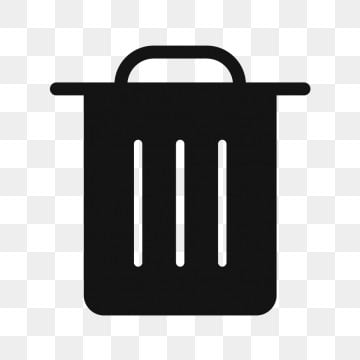
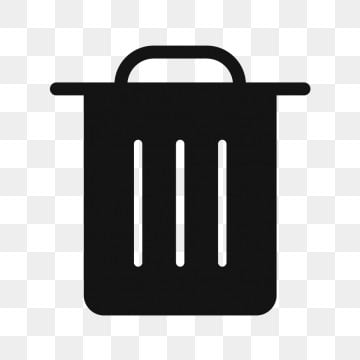
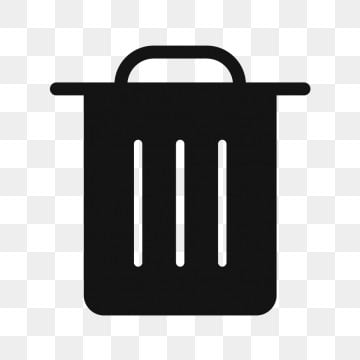
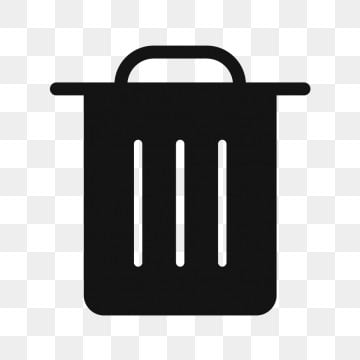
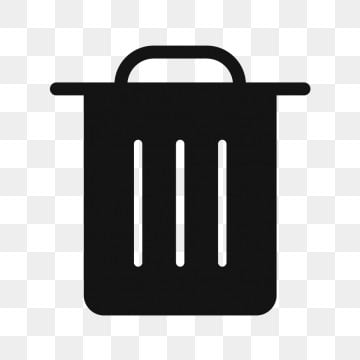
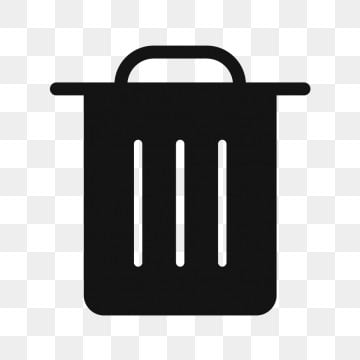
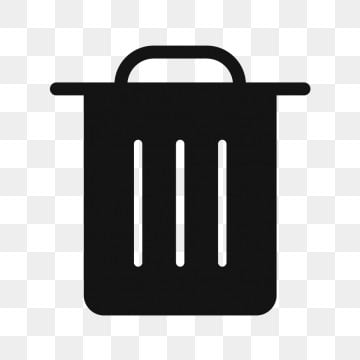
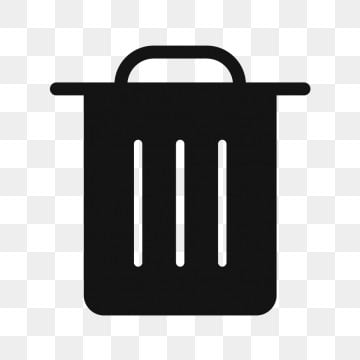
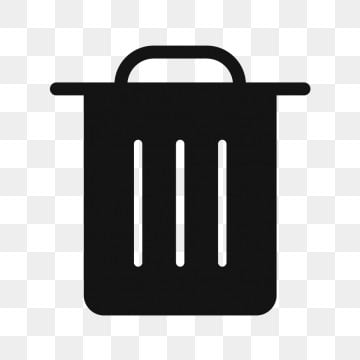
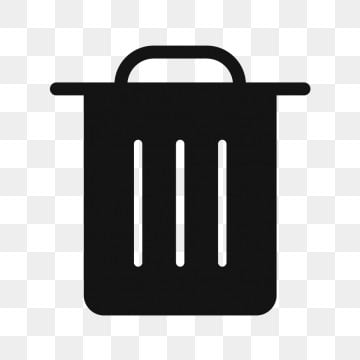
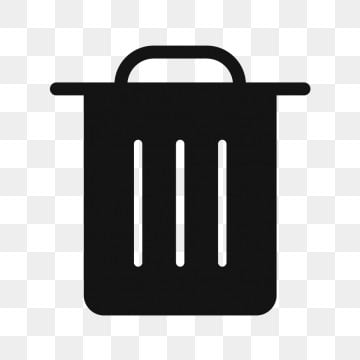
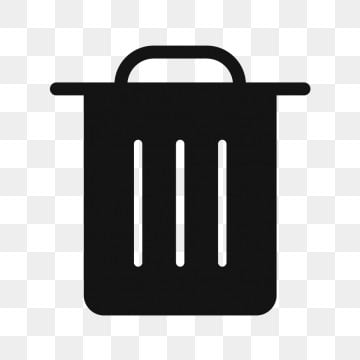
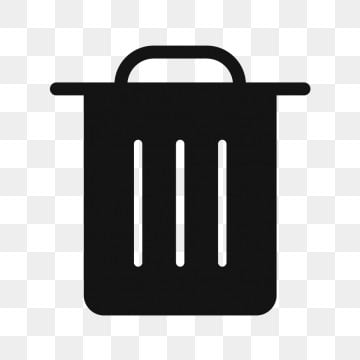
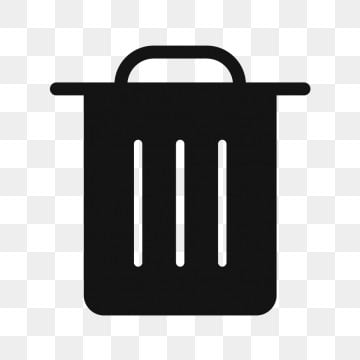
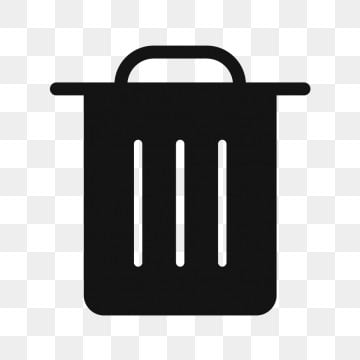
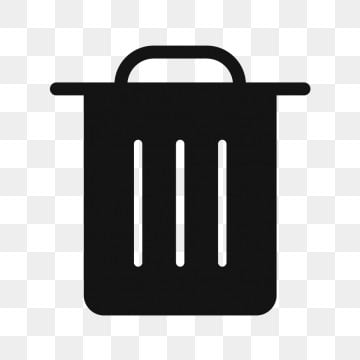
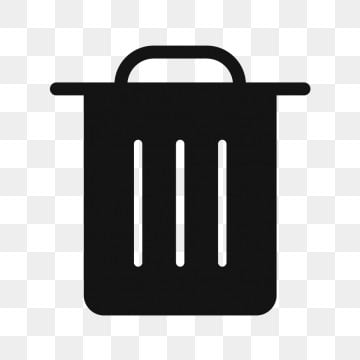
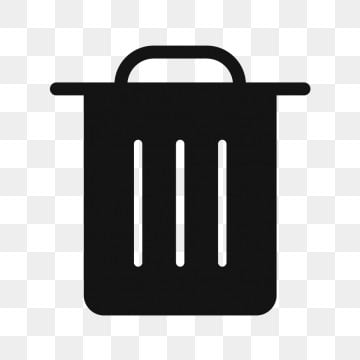
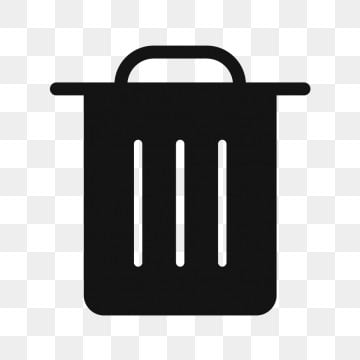
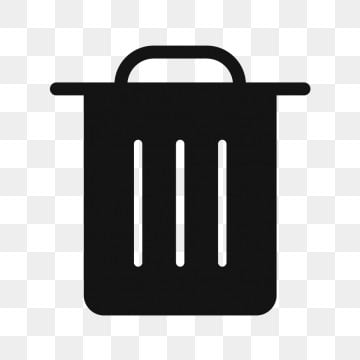
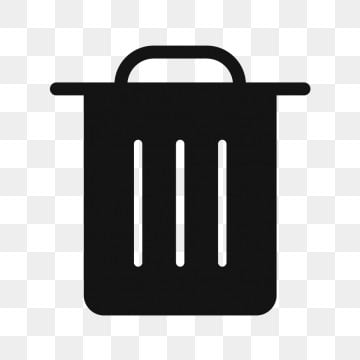
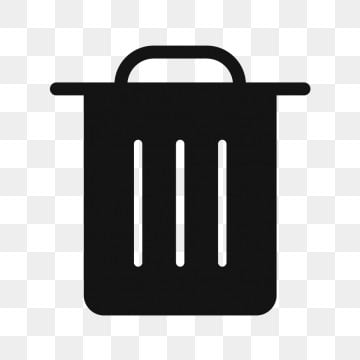
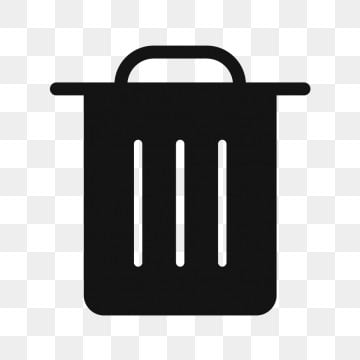
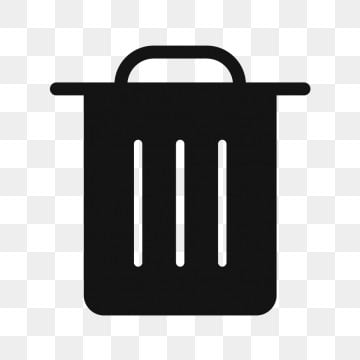
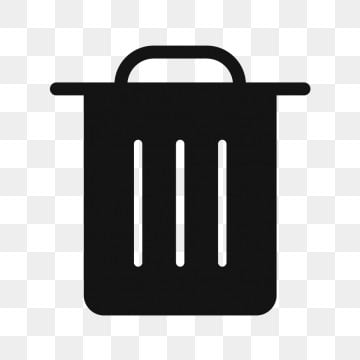
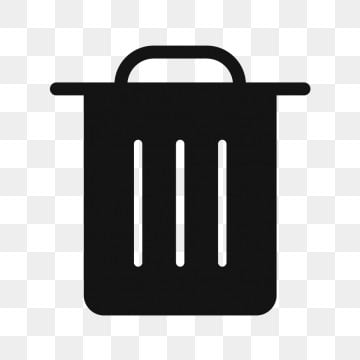
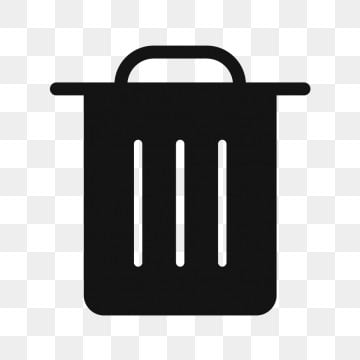
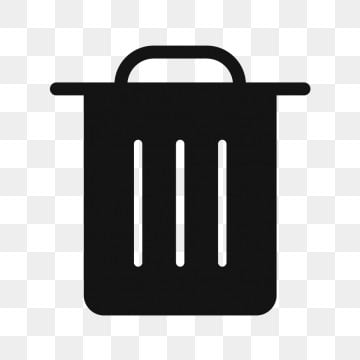
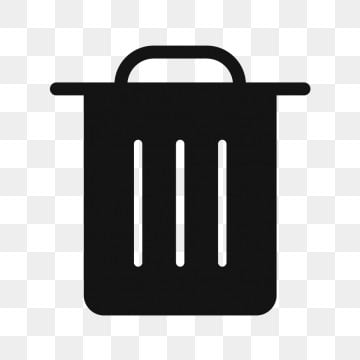
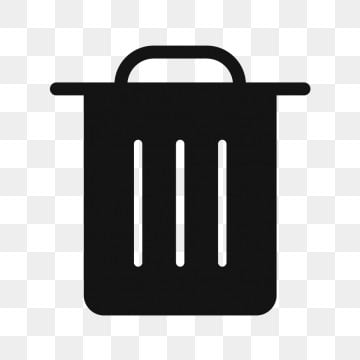
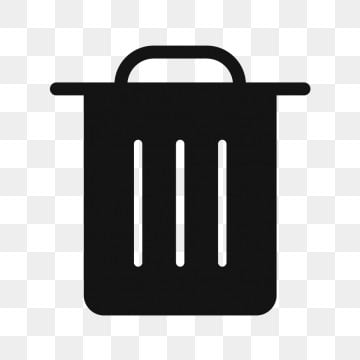
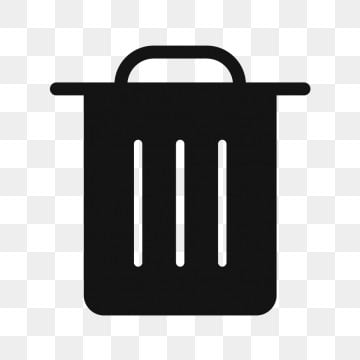
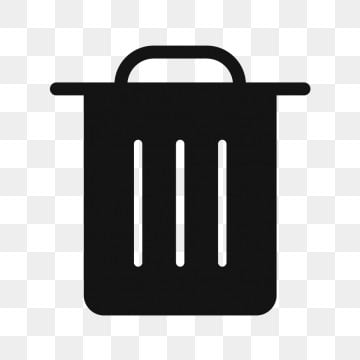
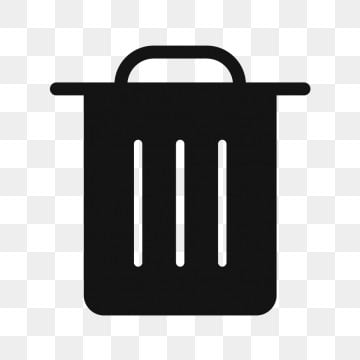
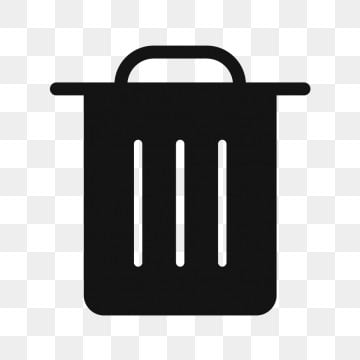
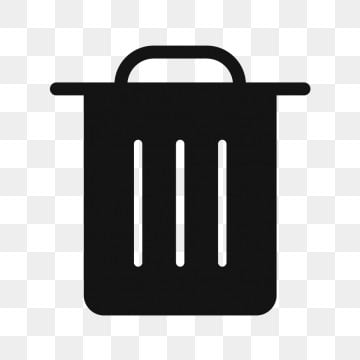
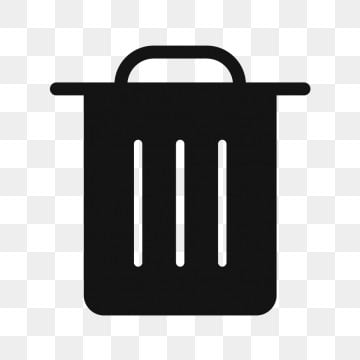
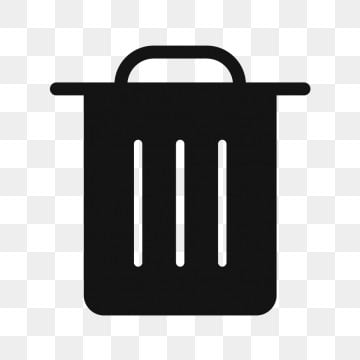
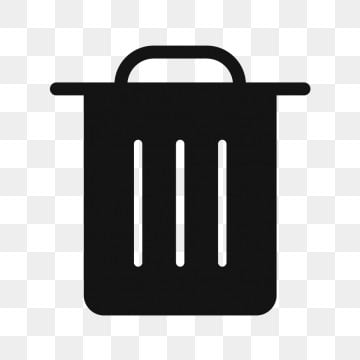
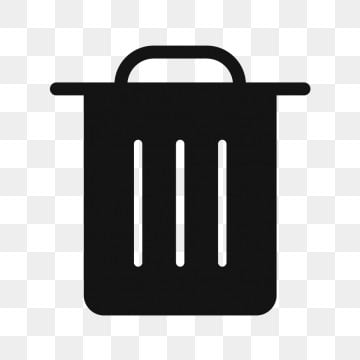
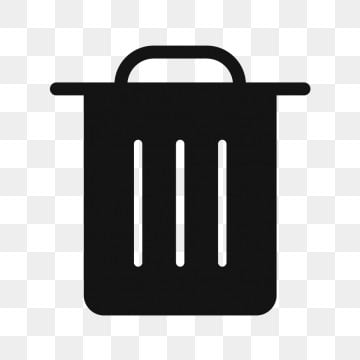
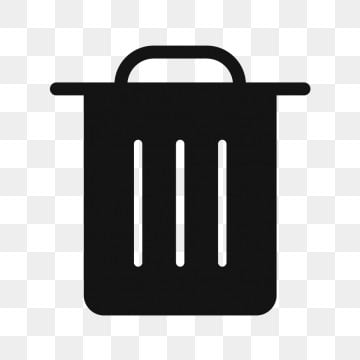
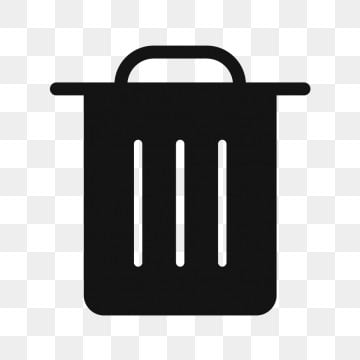
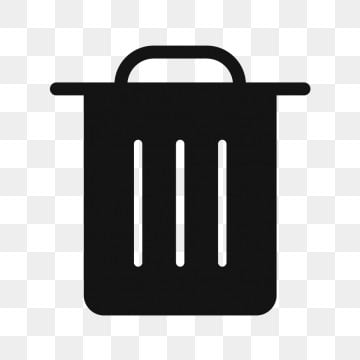
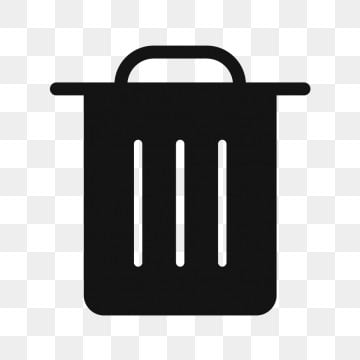
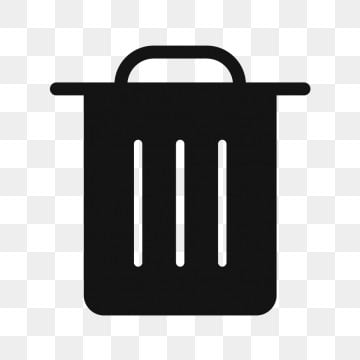
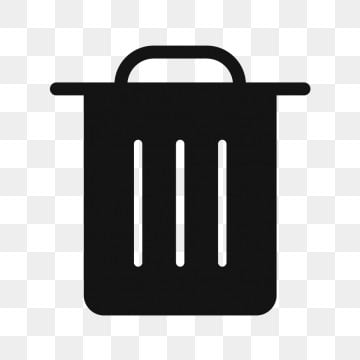
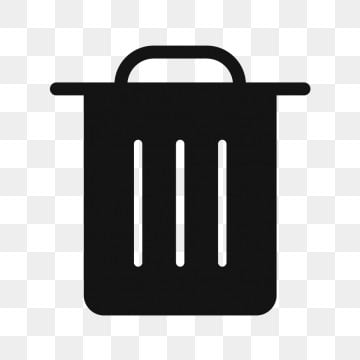
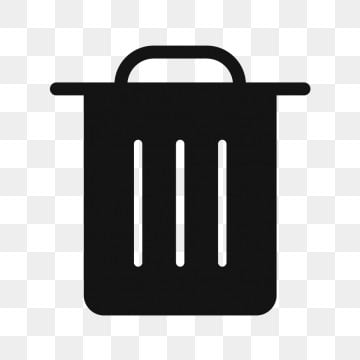
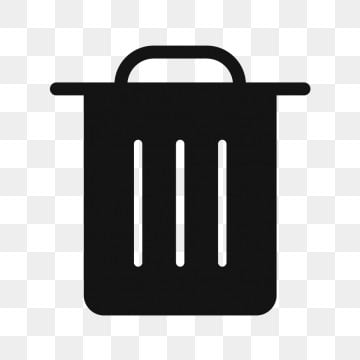
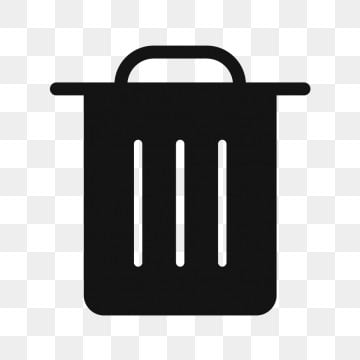
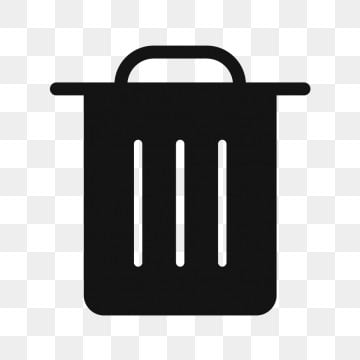
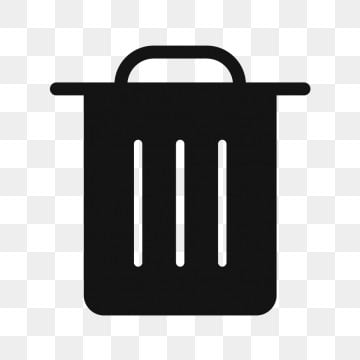
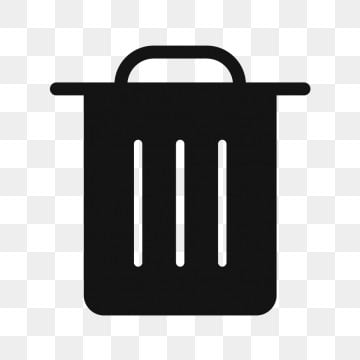
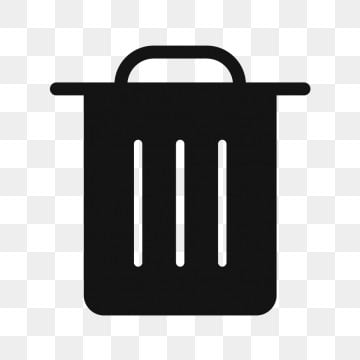
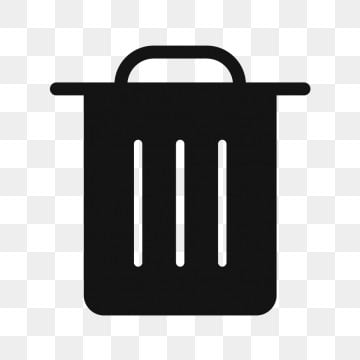
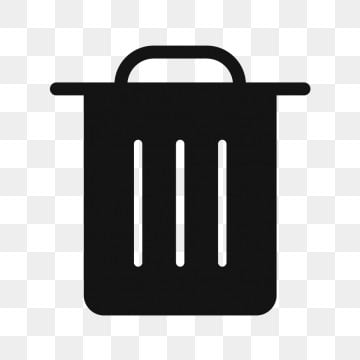
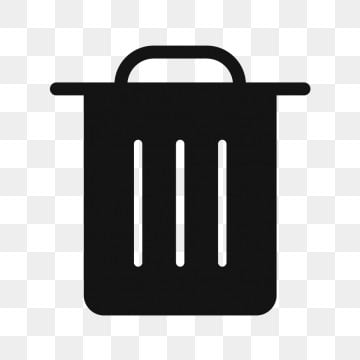
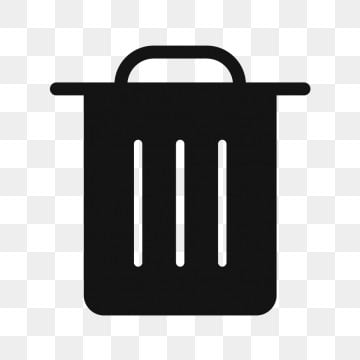
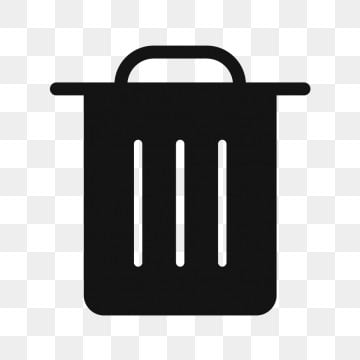
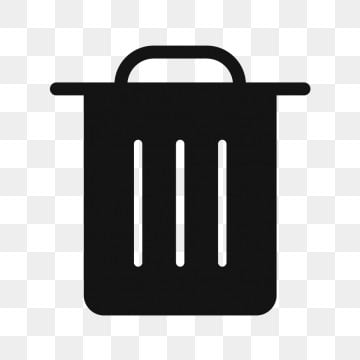
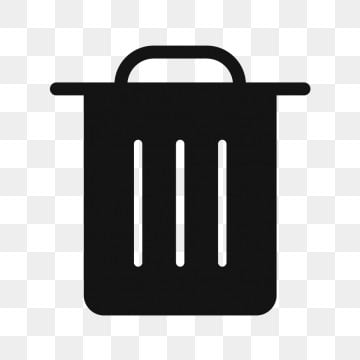
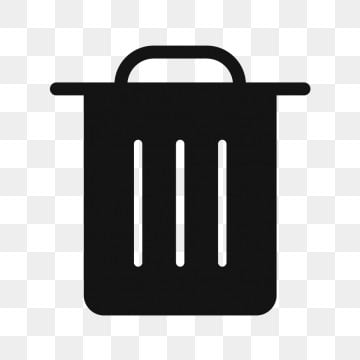
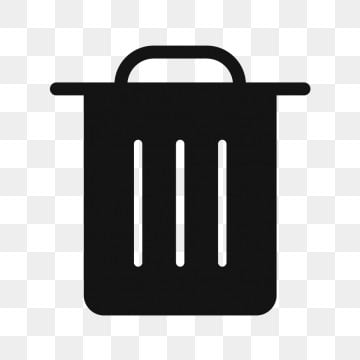
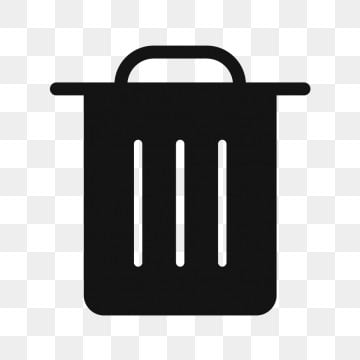
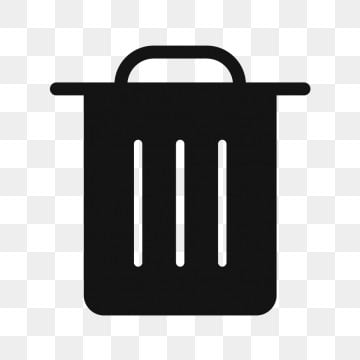
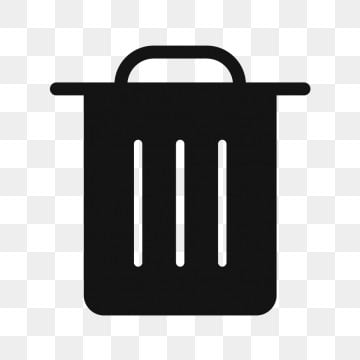
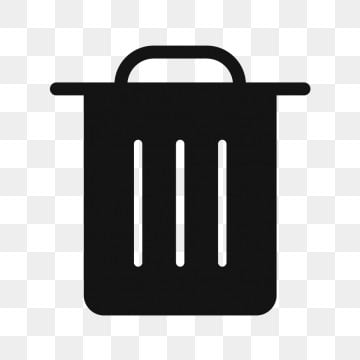
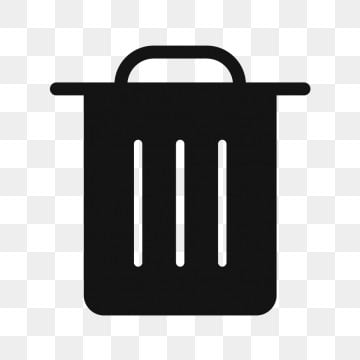
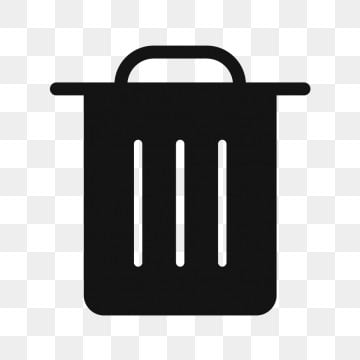
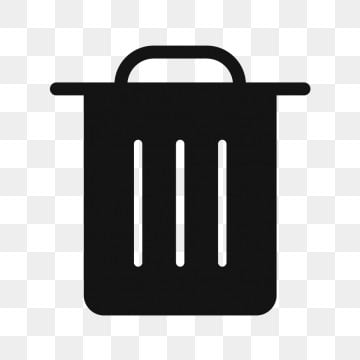
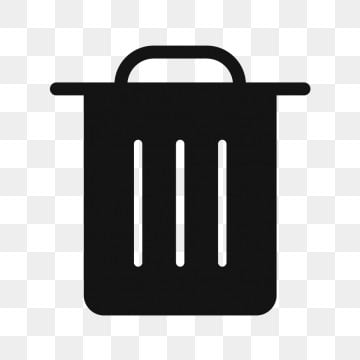
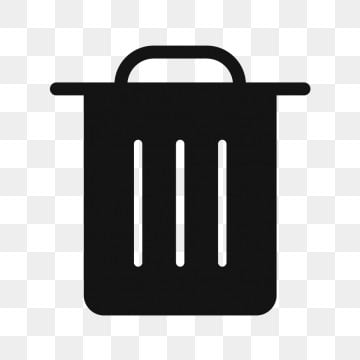
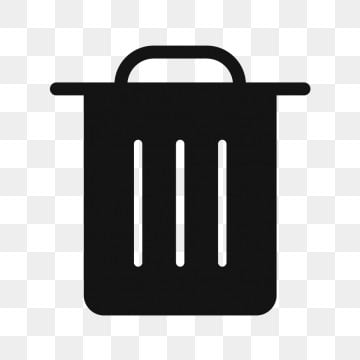
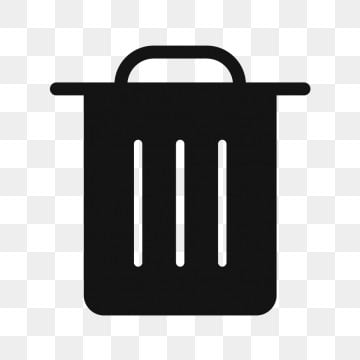
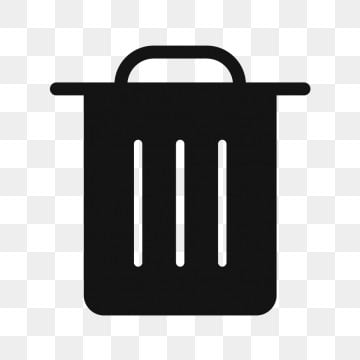
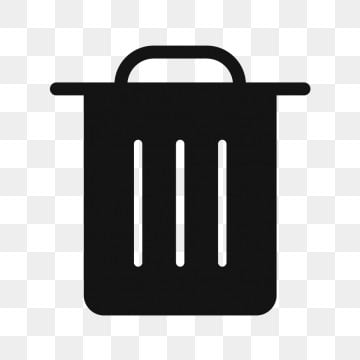
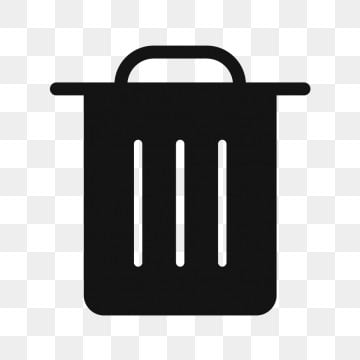
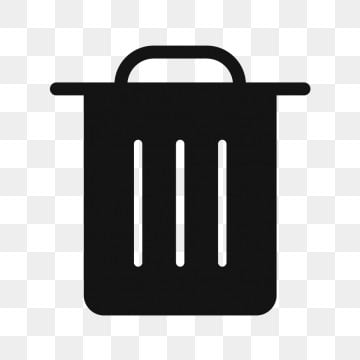
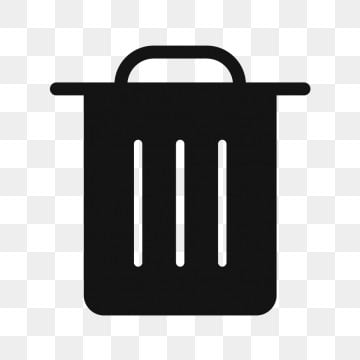
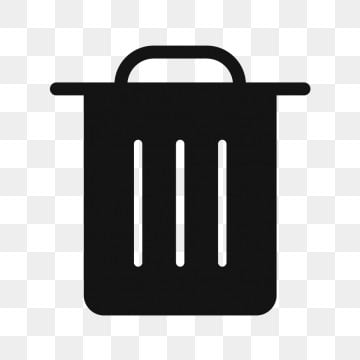
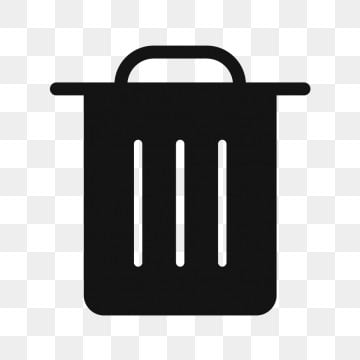
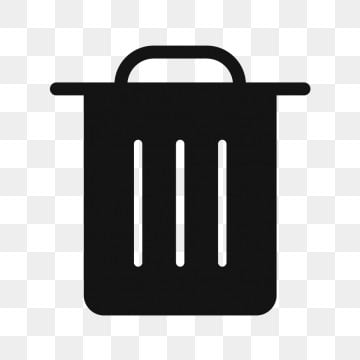
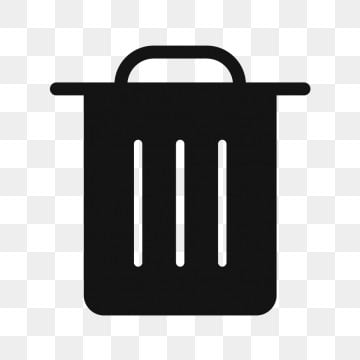
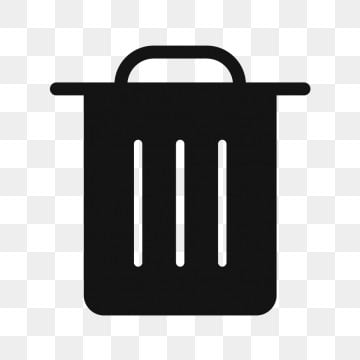
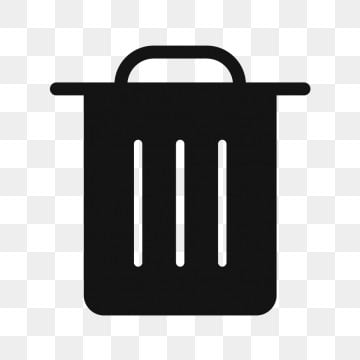
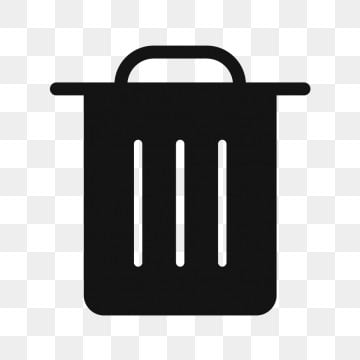
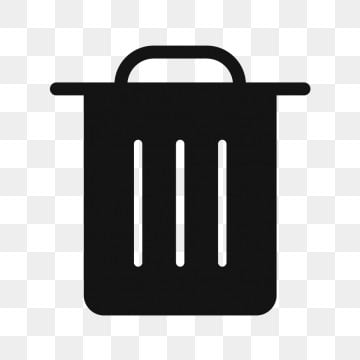
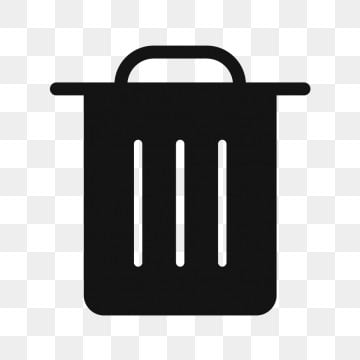
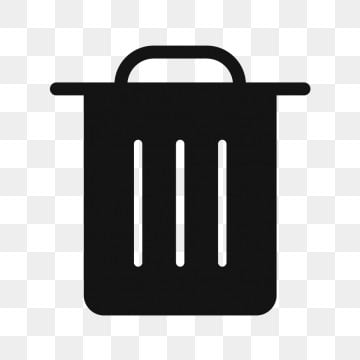
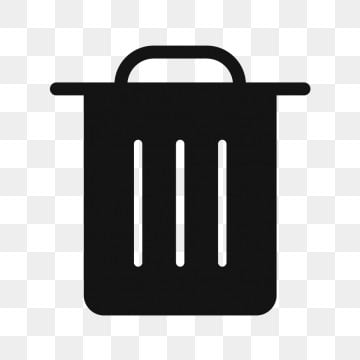
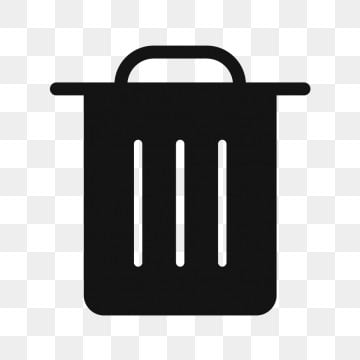
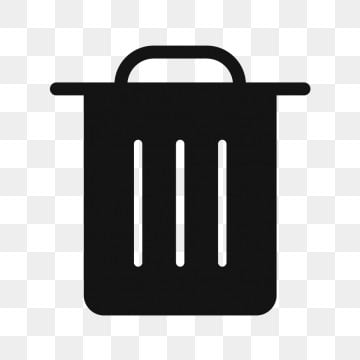
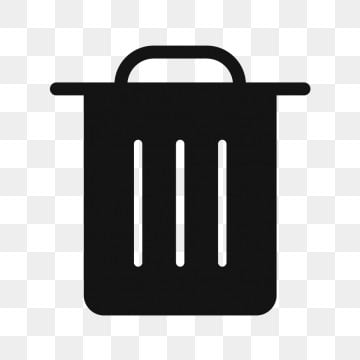
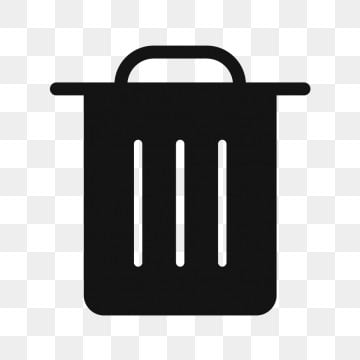
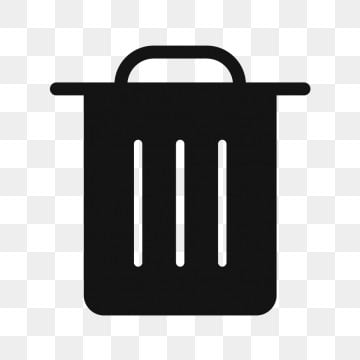
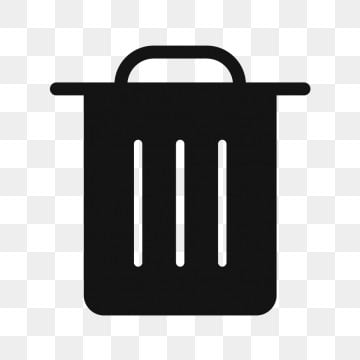
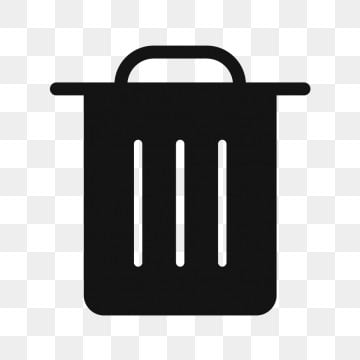
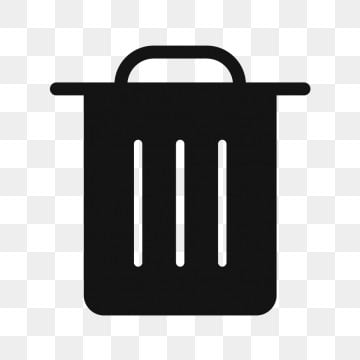
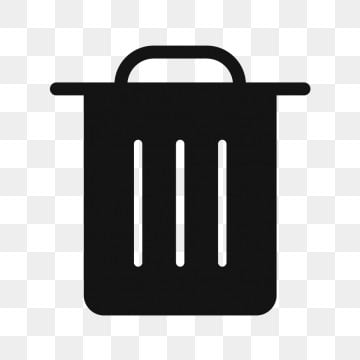
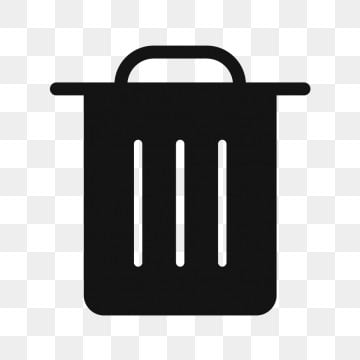
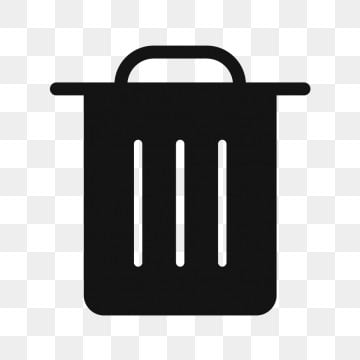
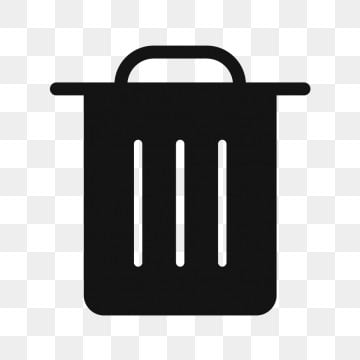
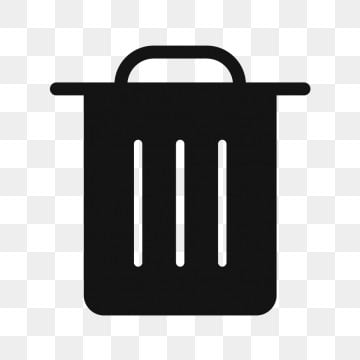
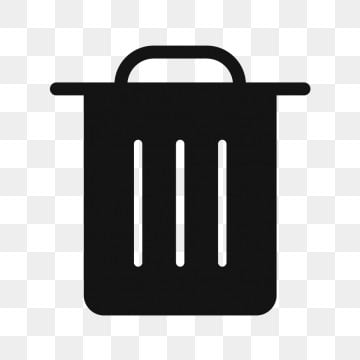
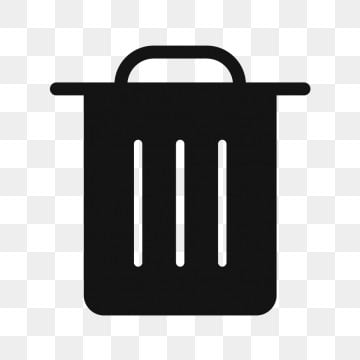
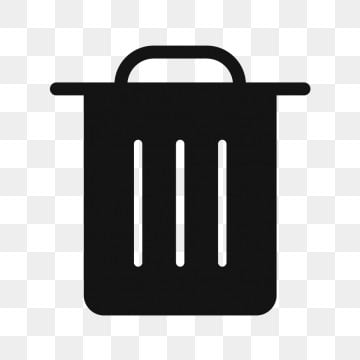
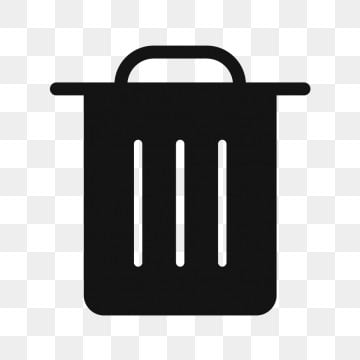
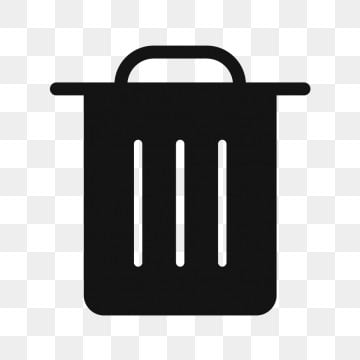
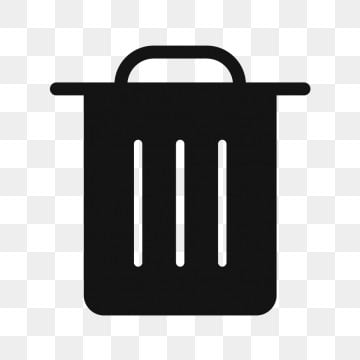
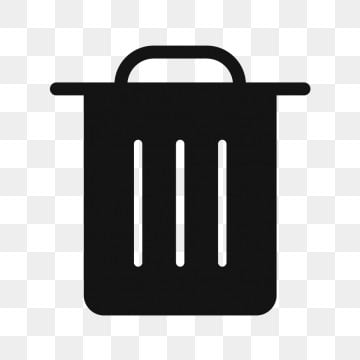
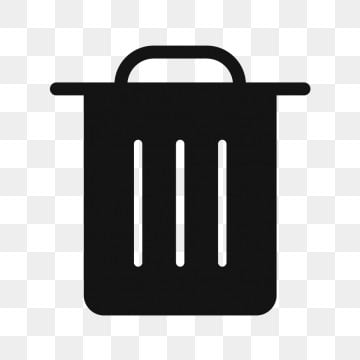
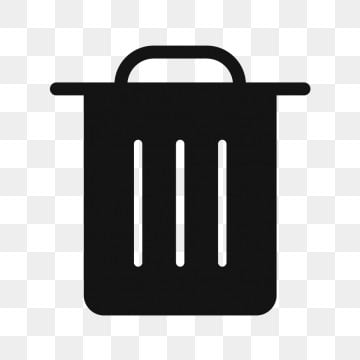
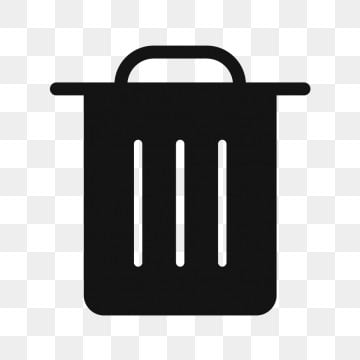
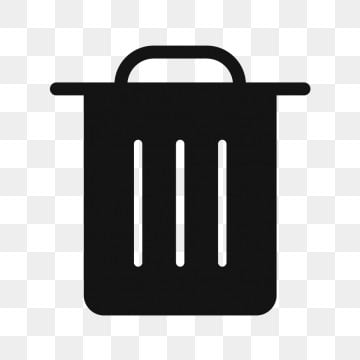
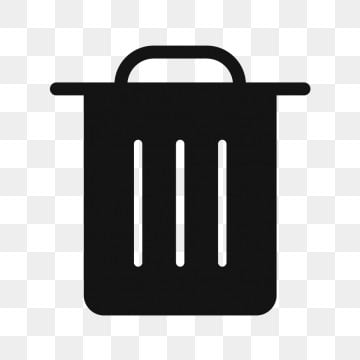
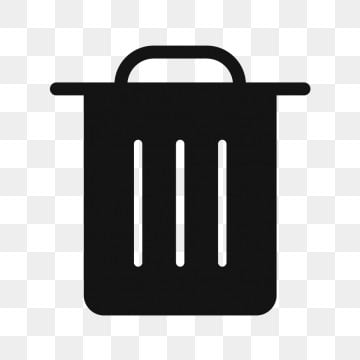
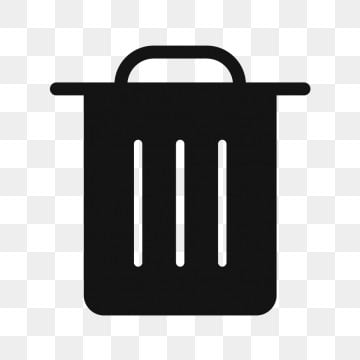
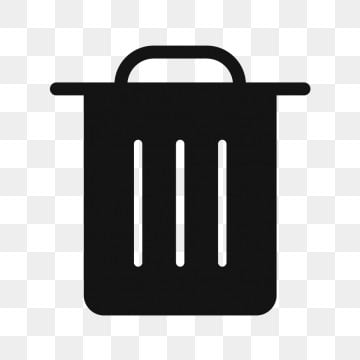
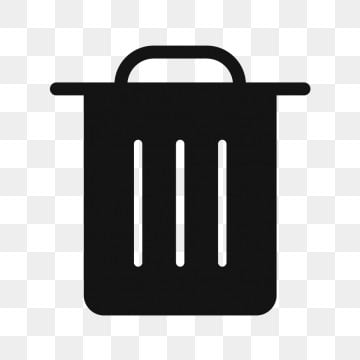

In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim
import json

# 파일 
trash = pd.read_excel('D:/Task/Rawdata/processed_files/trash_final.xlsx')

# 클러스터링 결과를 데이터프레임에 추가
data_points = [(i,j) for i,j in zip(trash['x좌표'].values, trash['y좌표'].values)]
kmeans = KMeans(n_clusters=4).fit(data_points)
kmean_centers = kmeans.cluster_centers_
column_name = ['위도', '경도']
new_trash = pd.DataFrame(data_points, columns=column_name)
new_trash['cluster_id'] = kmeans.labels_
new_trash = new_trash.reset_index(drop=True)
trash = pd.concat([trash, new_trash], axis=1)
trash = trash.drop(['x좌표', 'y좌표'], axis=1)
trash.to_excel('D:/Task/Rawdata/processed_files/trash_with_dong.xlsx')

# 클러스터링된 데이터를 색상으로 나타내기 위한 컬러맵 생성
# colors = sns.color_palette("hsv", len(set(trash['cluster_id']))).as_hex()
colors = ['red', 'green', 'blue', 'orange']
# 지도 초기 위치 설정 (위도, 경도 중심점 설정)
map_center = [trash['위도'].mean(), trash['경도'].mean()]

# Folium 지도 생성
m = folium.Map(location=map_center, zoom_start=12)

#geojson 파일 불러오기
seoul_geo = json.load(open('D:/Task/Rawdata/HangJeongDong_ver20230701.geojson',encoding='utf8'))
seoul_geo['features'] = seoul_geo['features'][:17] # 서울 :424
df_result = pd.read_excel('D:/Task/Rawdata/processed_files/meanpopulation_jongro_final.xlsx')

# m = folium.Map(location = ['37.5735042429813', '126.978989954189'], zoom_start=15)
fmap = folium.Choropleth(geo_data = seoul_geo,
                         data = df_result,
                         columns=['행정동','평균생활인구수'],
                         key_on='feature.properties.temp',fill_color='BuPu',
                         fill_opacity=0.7, line_opacity=0.3,
                         legend_name = '생활인구수',
                         highlight = True
                        ).add_to(m)
m

# 클러스터별로 데이터 포인트를 Folium CircleMarker로 추가
for cluster_id, color in zip(set(trash['cluster_id']), colors):
    cluster_points = trash[trash['cluster_id'] == cluster_id]
    for idx, row in cluster_points.iterrows():
        folium.CircleMarker(
            location=[row['위도'], row['경도']],
            radius=5,
            color=color,
            fill=False,
            
            fill_opacity=0.7,
            popup=f"{row['세부 위치(상세 주소)']}의 {row['수거 쓰레기 종류(일반 쓰레기 / 재활용 쓰레기)']}"
        ).add_to(m)
        
#클러스터 중심점을 Folium Marker로 추가
for center in kmean_centers:
    folium.Marker(
        location=center,
        icon=folium.Icon(color='black'),
        popup='Cluster Center'
    ).add_to(m)
m.save("D:/Task/map_with_clustering.html")
m.save("D:/Task/clustering.png")

#쓰레기데이터 지도에 띄우기
trash = pd.read_csv('D:/Task/Rawdata/trash_tool.csv', encoding='euc-kr')
trash.rename(columns={'세부 위치(상세 주소)':'주소'},inplace=True)
trash.rename(columns={'수거 쓰레기 종류(일반 쓰레기 / 재활용 쓰레기)':'종류'},inplace=True)
icon_img = 'D:/Task/image/garbage.jpg'


#folium.MarkerCluster 주변지역을 묶어서 대략적인 개수 분포를 볼 수 있다.
mc = MarkerCluster()
for i, row in trash.iterrows():
    mc.add_child(folium.Marker(location=[row['x좌표'], row['y좌표']],
                               radius=400,
                               icon=folium.features.CustomIcon(icon_img, icon_size=(20, 20)),
                               popup=str(trash.loc[i, '주소']) + ' ' + str(trash.loc[i, '종류'])))

m.add_child(mc)
m